In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats

%matplotlib inline

In [10]:
# import dataset
data = pd.read_csv("ML_Autism.csv")
data.head()

ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice family_autism  \
0         0         1  ...       f               ?       no            no   
1         0         0  ...       m               ?       no            no   
2         1         1  ...       m  White-European       no           yes   
3         0         0  ...       f               ?       no            no   
4         0         0  ...       m               ?       no            no   

   contry_of_res used_app_before     result     age_desc  relation ASD  
0        Austria              no   6.351166  18 and more      Self   0  
1          India              no   2.255185  18 and more      Self   0  
2  United States              no  14.851484  18 and more      Self   1  
3  United States              no   2.276617  18 and more      Self   0  
4   South Africa              no  -4.777286  18 and more      Self   0  

[5 rows x 22 columns]

In [5]:
# get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  family_autism    800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display basic information about the dataset
print(data.info())

# Show the first few rows of the dataset
print("\
First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\
Missing values:")
print(data.isnull().sum())

# Display summary statistics
print("\
Summary statistics:")
print(data.describe())

# Count of ASD diagnoses
print("\
Count of ASD diagnoses:")
print(data['ASD'].value_counts())

# Count of gender
print("\
Count of gender:")
print(data['gender'].value_counts())

print("Done")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  family_autism    800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [15]:
# replace ? to Missing in the entire dataset
data = data.replace('?', 'Missing')

In [17]:
data.head()

ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice family_autism  \
0         0         1  ...       f         Missing       no            no   
1         0         0  ...       m         Missing       no            no   
2         1         1  ...       m  White-European       no           yes   
3         0         0  ...       f         Missing       no            no   
4         0         0  ...       m         Missing       no            no   

   contry_of_res used_app_before     result     age_desc  relation ASD  
0        Austria              no   6.351166  18 and more      Self   0  
1          India              no   2.255185  18 and more      Self   0  
2  United States              no  14.851484  18 and more      Self   1  
3  United States              no   2.276617  18 and more      Self   0  
4   South Africa              no  -4.777286  18 and more      Self   0  

[5 rows x 22 columns]

# 1. Exploratory Data Analysis

C:\Users\harle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


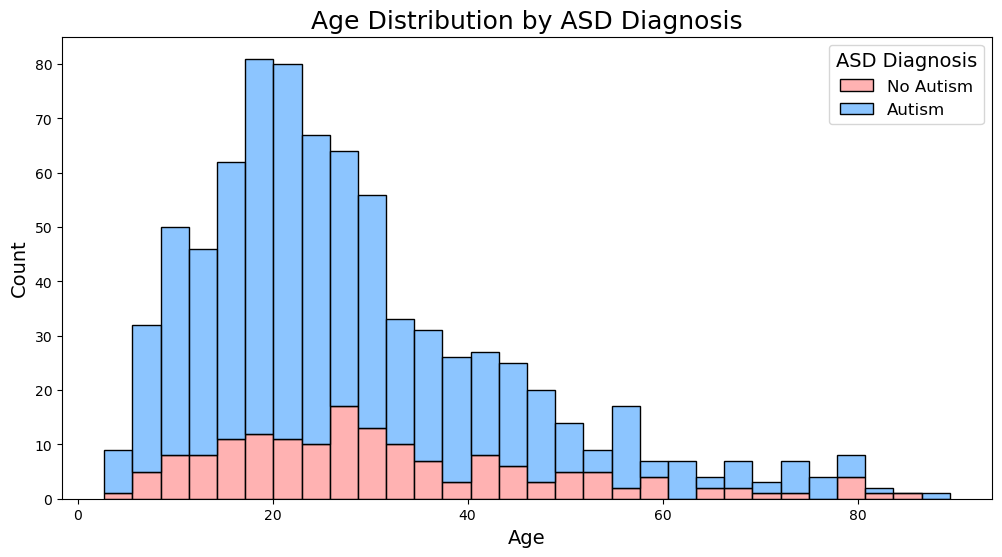

In [37]:

# Create the figure and plot the histogram with better labeling and legend
plt.figure(figsize=(12, 6))

# Plot the distribution of age by ASD diagnosis with custom colors
sns.histplot(data=data, x='age', hue='ASD', multiple='stack', bins=30, 
             palette={0: '#66B2FF', 1: '#FF9999'})  # Define color mapping for ASD categories

# Add title and axis labels with larger font sizes for better readability
plt.title('Age Distribution by ASD Diagnosis', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize the legend to be more descriptive
plt.legend(title='ASD Diagnosis', labels=['No Autism', 'Autism'], fontsize=12, title_fontsize=14)

# Show the plot
plt.show()


In [ ]:
#The age distribution shows that younger individuals are more likely to have an ASD diagnosis.

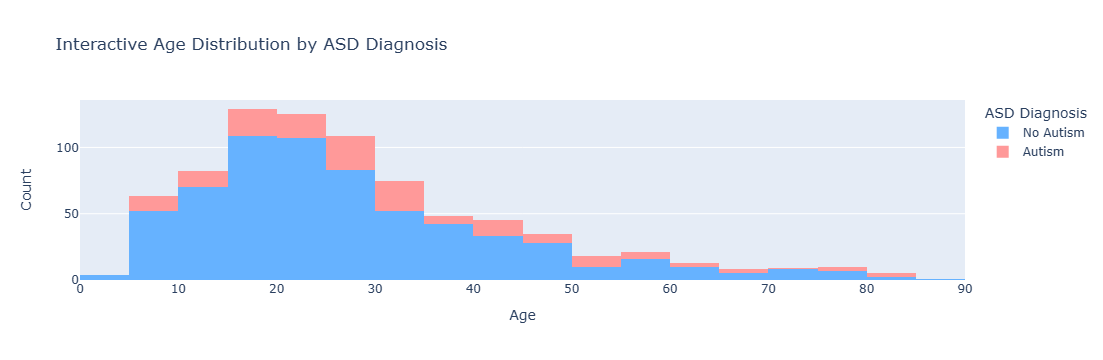

In [42]:
import plotly.express as px

# Interactive age distribution by ASD diagnosis
fig = px.histogram(data, x='age', color='ASD', nbins=30, 
                   color_discrete_map={0: '#66B2FF', 1: '#FF9999'}, 
                   labels={'ASD': 'ASD Diagnosis'}, 
                   title="Interactive Age Distribution by ASD Diagnosis")

# Update axis labels
fig.update_layout(xaxis_title="Age", yaxis_title="Count")

# Customize legend labels
fig.for_each_trace(lambda t: t.update(name={'0': 'No Autism', '1': 'Autism'}[t.name]))

# Show interactive plot
fig.show()


In [35]:
# Create the plots
have_autism = data.loc[data['ASD'] == 1, 'gender'].value_counts().hvplot.bar(alpha=0.4, label='Have Autism')
no_autism = data.loc[data['ASD'] == 0, 'gender'].value_counts().hvplot.bar(alpha=0.4, label='No Autism')

# Overlay the plots
combined_plot = no_autism * have_autism

# Set plot options
combined_plot.opts(
    title="Autism by Gender",
    xlabel='Gender',
    ylabel='Count',
    width=500,
    height=450,
    legend_cols=2,
    legend_position='top_right'
)

#Here, it shows males with autism = 106 and without = 424
# females with autism = 55 and without= 215

:Overlay
   .Bars.No_Autism   :Bars   [gender]   (count)
   .Bars.Have_Autism :Bars   [gender]   (count)

In [ ]:
# Males have a higher count of ASD diagnoses compared to females, but the proportion within each gender is similar.

C:\Users\harle\AppData\Local\Temp\ipykernel_10248\1402330733.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ethnicity_asd_prop = data.groupby('ethnicity')['ASD'].mean()  # Calculate proportion


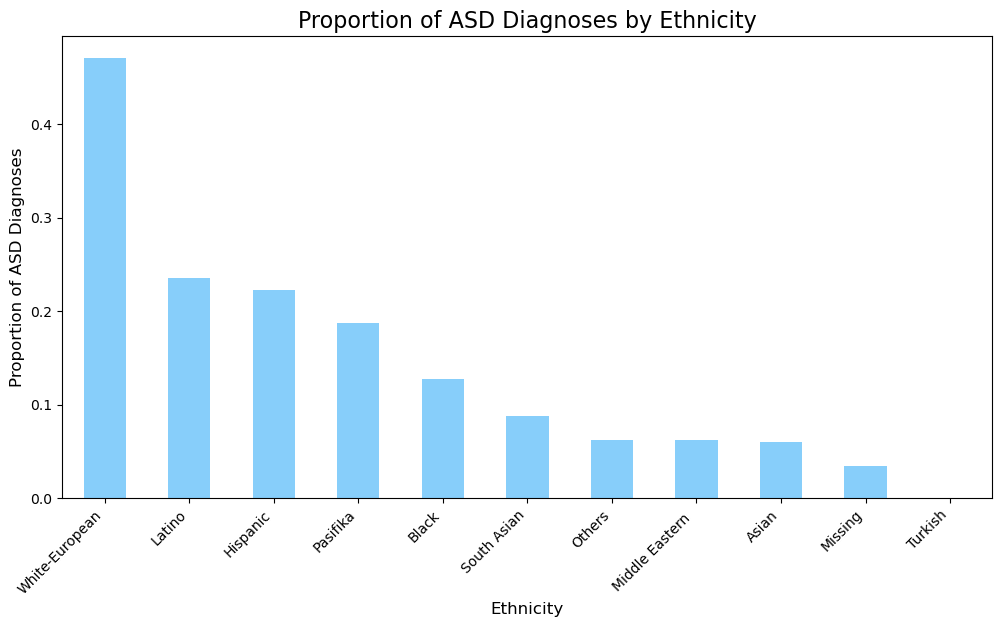

In [27]:
# Proportion of ASD Diagnoses by Ethnicity
plt.figure(figsize=(12, 6))
ethnicity_asd_prop = data.groupby('ethnicity')['ASD'].mean()  # Calculate proportion
ethnicity_asd_prop.sort_values(ascending=False).plot(kind='bar', color='#87CEFA')
plt.title('Proportion of ASD Diagnoses by Ethnicity', fontsize=16)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Proportion of ASD Diagnoses', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()
print()

In [ ]:
# White-European ethnicity has the highest proportion of ASD diagnoses, while other ethnicities show varying proportions.

C:\Users\harle\AppData\Local\Temp\ipykernel_10248\751668987.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jaundice_asd_prop = data.groupby('jaundice')['ASD'].mean()  # Calculate proportion


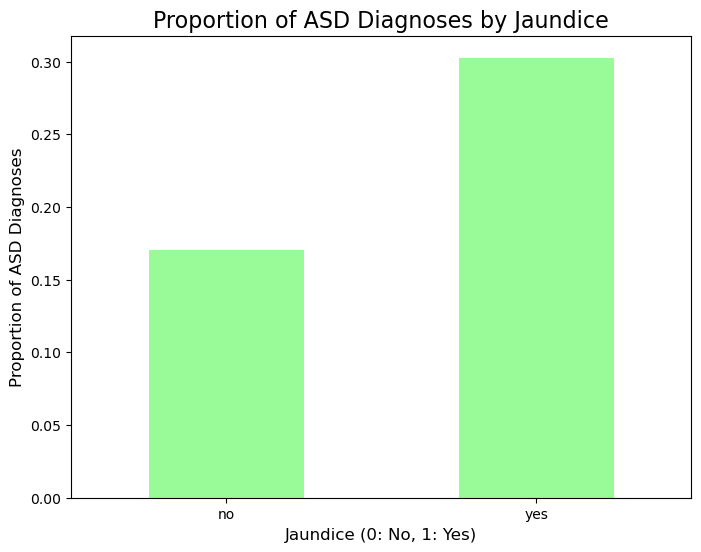

In [29]:
# Proportion of ASD Diagnoses by Jaundice
plt.figure(figsize=(8, 6))
jaundice_asd_prop = data.groupby('jaundice')['ASD'].mean()  # Calculate proportion
jaundice_asd_prop.plot(kind='bar', color='#98FB98')
plt.title('Proportion of ASD Diagnoses by Jaundice', fontsize=16)
plt.xlabel('Jaundice (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Proportion of ASD Diagnoses', fontsize=12)
plt.xticks(rotation=0)
plt.show()
print()

In [ ]:
# Individuals with a history of jaundice have a higher proportion of ASD diagnoses compared to those without.

C:\Users\harle\AppData\Local\Temp\ipykernel_10248\3191872731.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  family_autism_asd_prop = data.groupby('family_autism')['ASD'].mean()  # Calculate proportion


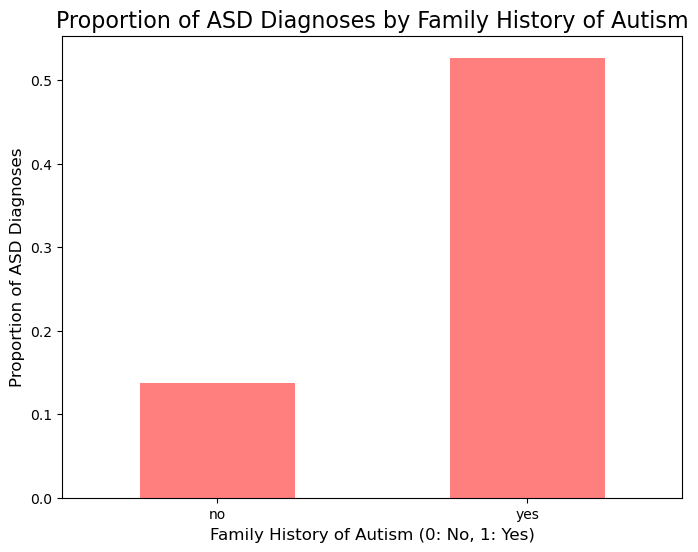

In [31]:
# Proportion of ASD Diagnoses by Family History of Autism
plt.figure(figsize=(8, 6))
family_autism_asd_prop = data.groupby('family_autism')['ASD'].mean()  # Calculate proportion
family_autism_asd_prop.plot(kind='bar', color='#FF7F7F')
plt.title('Proportion of ASD Diagnoses by Family History of Autism', fontsize=16)
plt.xlabel('Family History of Autism (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Proportion of ASD Diagnoses', fontsize=12)
plt.xticks(rotation=0)
plt.show()
print()

In [40]:
# A family history of autism is strongly associated with a higher proportion of ASD diagnoses.

# 2. Correlation Matrix of Numerical Values 

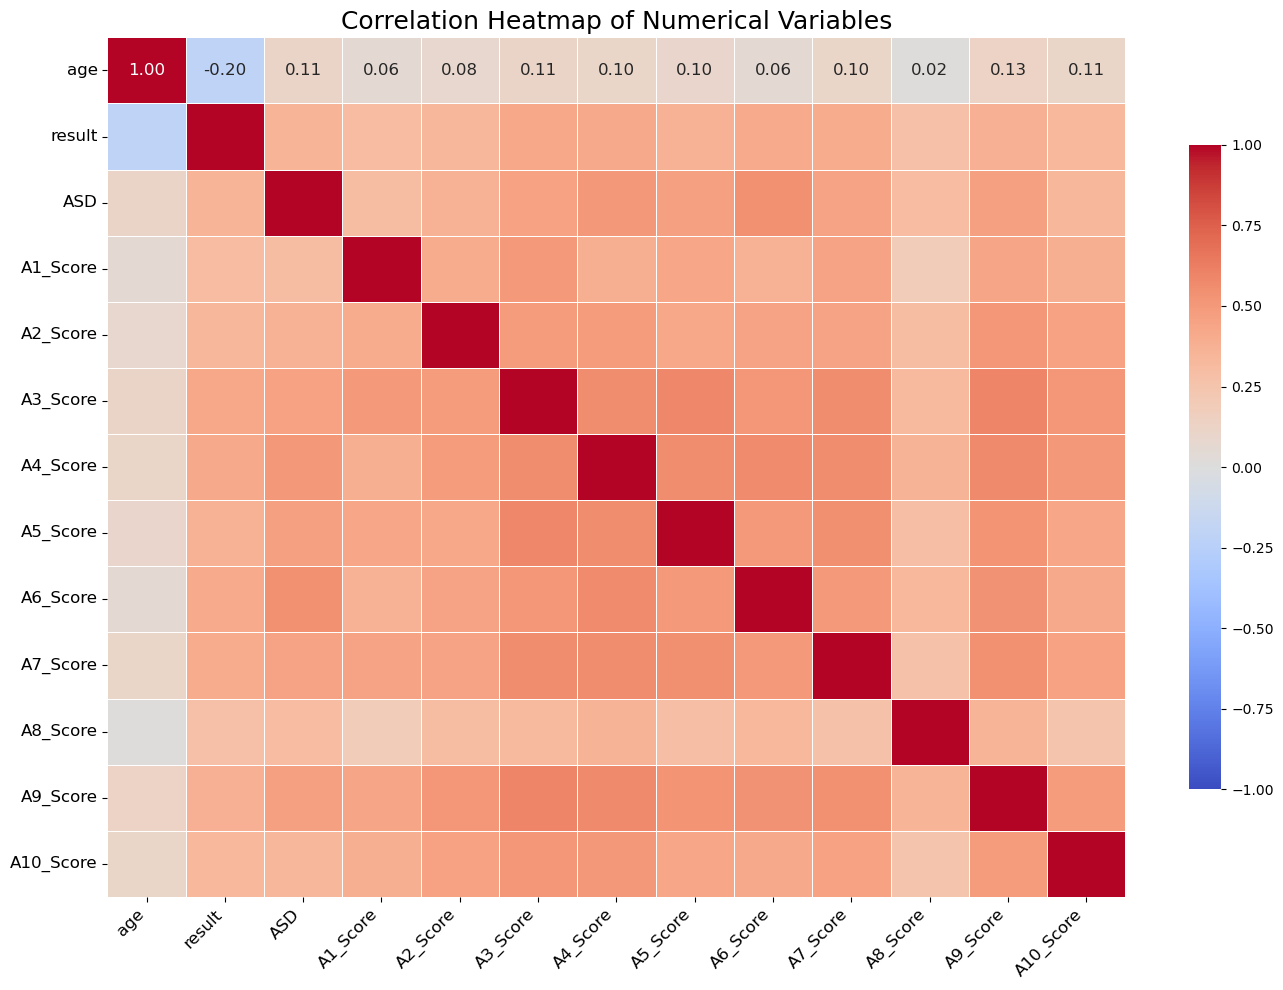

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns for correlation analysis
numeric_columns = ['age', 'result', 'ASD'] + [f'A{i}_Score' for i in range(1, 11)]

# Compute correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Set up the figure size
plt.figure(figsize=(14, 10))

# Draw the heatmap with better formatting
sns.heatmap(correlation_matrix, 
            annot=True,            # Display correlation values
            annot_kws={"size": 12}, # Size of annotations
            cmap='coolwarm',       # Color map for heatmap
            vmin=-1, vmax=1,       # Range for correlation values
            center=0,              # Center the colormap around 0
            linewidths=0.5,        # Width of lines between squares
            fmt=".2f",             # Format of the annotation text
            cbar_kws={"shrink": .75})  # Customize color bar size

# Add title and adjust layout for better spacing
plt.title('Correlation Heatmap of Numerical Variables', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


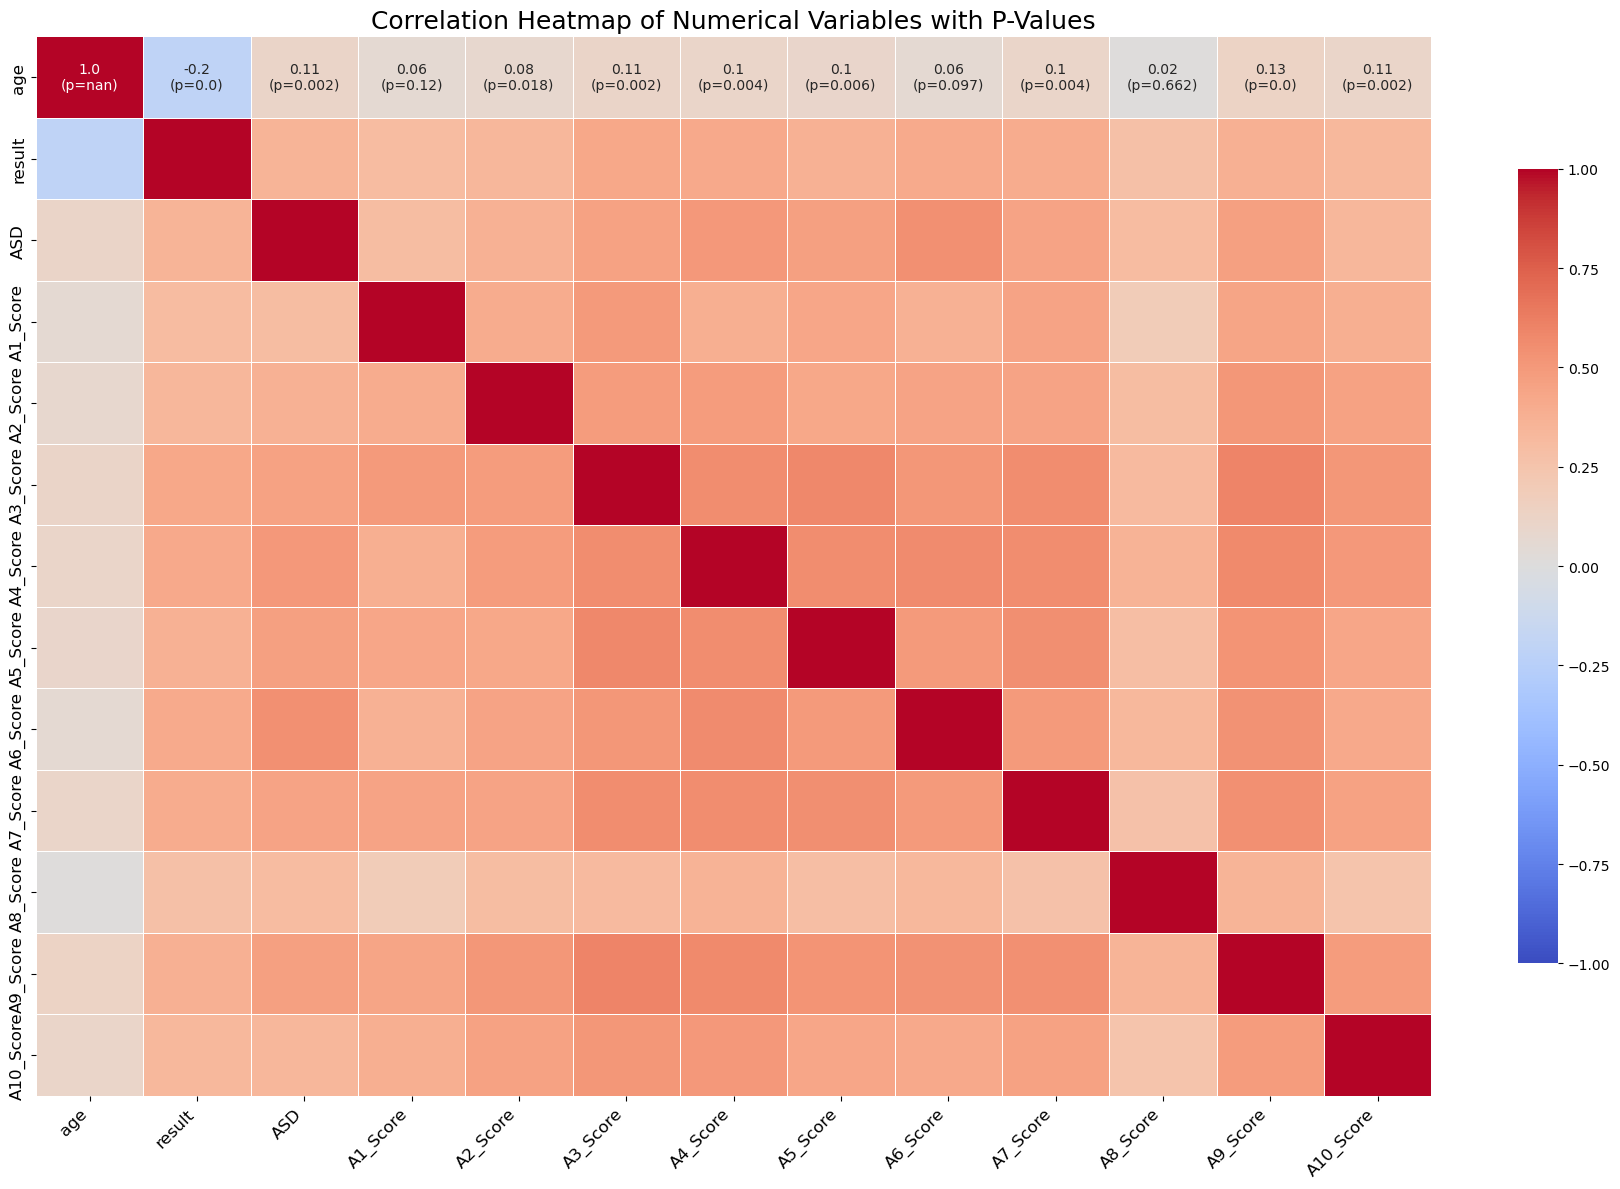

In [115]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
 
# List of numeric columns for correlation analysis
numeric_columns = ['age', 'result', 'ASD'] + [f'A{i}_Score' for i in range(1, 11)]
 # Compute correlation matrix
correlation_matrix = data[numeric_columns].corr()
 
# Function to calculate p-values

def calculate_p_values(df):

    p_matrix = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)

    for i in range(df.shape[1]):

        for j in range(df.shape[1]):

            if i != j:

                _, p_matrix.iloc[i, j] = stats.pearsonr(df.iloc[:, i], df.iloc[:, j])

            else:

                p_matrix.iloc[i, j] = np.nan  # NaN for diagonal elements

    return p_matrix
 
# Compute p-values matrix

p_values = calculate_p_values(data[numeric_columns])
 
# Set up the figure size

plt.figure(figsize=(18, 12))
 
# Mask for significant correlations (e.g., p < 0.05)

mask_significant = p_values < 0.05
 
# Create an annotation array combining correlation and p-values

annot_array = correlation_matrix.round(2).astype(str) + "\n(p=" + p_values.round(3).astype(str) + ")"
 
# Draw the heatmap with correlation coefficients and p-values

sns.heatmap(correlation_matrix, 

            annot=annot_array,     # Display correlation values with p-values

            annot_kws={"size": 10}, # Size of annotations

            cmap='coolwarm',       # Color map for heatmap

            vmin=-1, vmax=1,       # Range for correlation values

            center=0,              # Center the colormap around 0

            linewidths=0.5,        # Width of lines between squares

            fmt="",                # Disable internal formatting of the annotation

            cbar_kws={"shrink": .75})  # Customize color bar size
 
# Add title and adjust layout for better spacing

plt.title('Correlation Heatmap of Numerical Variables with P-Values', fontsize=18)

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.yticks(fontsize=12)

plt.tight_layout()
 
# Show the plot

plt.show()

 

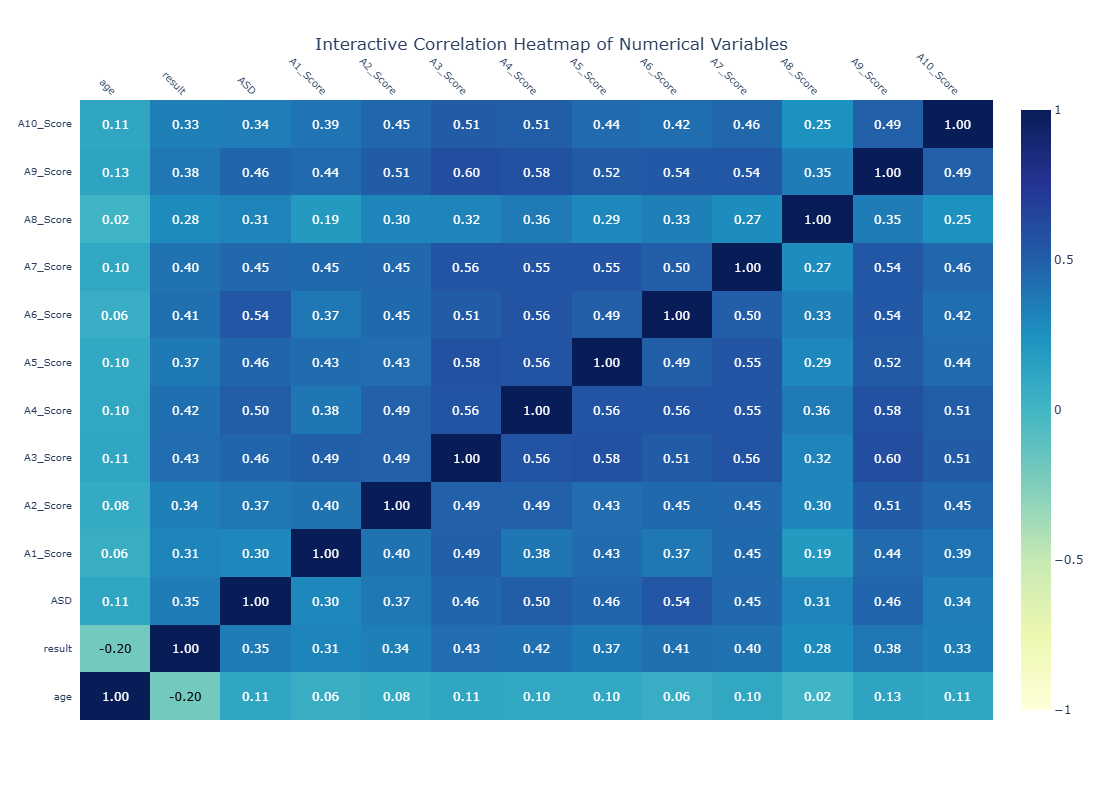

In [48]:
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Compute the correlation matrix
correlation_matrix = data[numeric_columns].corr().values

# Create labels for the heatmap
labels = numeric_columns

# Plot interactive heatmap
fig = ff.create_annotated_heatmap(
    z=correlation_matrix,
    x=labels,
    y=labels,
    annotation_text=[[f"{corr:.2f}" for corr in row] for row in correlation_matrix],
    colorscale='YlGnBu',  # Better color contrast
    showscale=True,       # Show the color scale
    zmin=-1, zmax=1,      # Set the limits for color scaling
)

# Update layout for better readability
fig.update_layout(
    title_text='Interactive Correlation Heatmap of Numerical Variables',
    title_x=0.5,  # Center title
    width=800, height=800,
    xaxis=dict(tickangle=45, tickfont=dict(size=10)),
    yaxis=dict(tickfont=dict(size=10))
)

# Show interactive heatmap
fig.show()


In [53]:
# Age and ASD: The correlation coefficient is 0.11, indicating a weak positive correlation. This suggests that age has a slight positive relationship with ASD diagnosis, but it's not a strong predictor on its own.
#Age and Result: The correlation coefficient is -0.20, indicating a weak negative correlation. This suggests that as age increases, the result value slightly decreases, but again, this is not a strong relationship.
#Age and A-Scores (A1 to A10): The correlations with the A-Scores are generally weak, with values ranging from 0.02 to 0.13. This indicates that age has no strong relationship with the individual A-Scores.
#Overall, age does not appear to be a significant factor in predicting ASD diagnosis or influencing the other variables in the dataset. The weak correlations suggest that other factors may be more important in understanding ASD diagnosis in this dataset.

# 3. Data Processing 

In [19]:
# remove useless columns (ID, age_desc)
data = data.drop(columns=['ID', 'age_desc'])

In [21]:
# categorical_val variables
categorical_val = ['gender', 'ethnicity', 'jaundice', 'family_autism', 'contry_of_res', 'used_app_before', 'relation', 'ASD']

In [23]:
categorical_val.remove('ASD')
dataset = pd.get_dummies(data, columns = categorical_val)

In [25]:
dataset.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         0         1         0         1         0         1   
1         0         0         0         0         0         0         0   
2         1         1         1         1         1         1         1   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  contry_of_res_United States  \
0         0         1          1  ...                        False   
1         0         0          0  ...                        False   
2         1         1          1  ...                         True   
3         0         0          0  ...                         True   
4         0         0          0  ...                        False   

   contry_of_res_Viet Nam  used_app_before_no  used_app_before_yes  \
0                   False                True                False   
1                   False                True                False   
2                   False                True                False   
3                   False                True                False   
4                   False                True                False   

   relation_Health care professional  relation_Missing  relation_Others  \
0                              False             False            False   
1                              False             False            False   
2                              False             False            False   
3                              False             False            False   
4                              False             False            False   

   relation_Parent  relation_Relative  relation_Self  
0            False              False           True  
1            False              False           True  
2            False              False           True  
3            False              False           True  
4            False              False           True  

[5 rows x 94 columns]

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 94 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   A1_Score                            800 non-null    int64  
 1   A2_Score                            800 non-null    int64  
 2   A3_Score                            800 non-null    int64  
 3   A4_Score                            800 non-null    int64  
 4   A5_Score                            800 non-null    int64  
 5   A6_Score                            800 non-null    int64  
 6   A7_Score                            800 non-null    int64  
 7   A8_Score                            800 non-null    int64  
 8   A9_Score                            800 non-null    int64  
 9   A10_Score                           800 non-null    int64  
 10  age                                 800 non-null    float64
 11  result                              800 non-n

In [27]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'result']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [29]:
print(data.columns)
print(dataset.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'family_autism', 'contry_of_res',
       'used_app_before', 'result', 'relation', 'ASD'],
      dtype='object')
Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'ASD',
       'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black',
       'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ',
       'ethnicity_Missing', 'ethnicity_Others', 'ethnicity_Pasifika',
       'ethnicity_South Asian', 'ethnicity_Turkish',
       'ethnicity_White-European', 'jaundice_no', 'jaundice_yes',
       'family_autism_no', 'family_autism_yes', 'contry_of_res_Afghanistan',
       'contry_of_res_AmericanSamoa', 'contry_of_res_Angola',
       'contry_of_res_Argentina', 'contry_of_res_Armenia',
       'con

In [87]:
dataset.head()

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         0         1         0         1         0         1   
1         0         0         0         0         0         0         0   
2         1         1         1         1         1         1         1   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  contry_of_res_United States  \
0         0         1          1  ...                        False   
1         0         0          0  ...                        False   
2         1         1          1  ...                         True   
3         0         0          0  ...                         True   
4         0         0          0  ...                        False   

   contry_of_res_Viet Nam  used_app_before_no  used_app_before_yes  \
0                   False                True                False   
1                   False                True                False   
2                   False                True                False   
3                   False                True                False   
4                   False                True                False   

   relation_Health care professional  relation_Missing  relation_Others  \
0                              False             False            False   
1                              False             False            False   
2                              False             False            False   
3                              False             False            False   
4                              False             False            False   

   relation_Parent  relation_Relative  relation_Self  
0            False              False           True  
1            False              False           True  
2            False              False           True  
3            False              False           True  
4            False              False           True  

[5 rows x 94 columns]

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [33]:
from sklearn.model_selection import train_test_split

X = dataset.drop('ASD', axis=1)
y = dataset.ASD

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
264         1         1         1         1         1         1         1   
615         0         0         0         0         0         0         1   
329         1         0         0         0         0         0         0   
342         0         0         0         0         0         0         0   
394         1         1         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
71          0         1         0         0         0         0         0   
106         0         0         0         1         0         0         0   
270         1         0         0         0         1         0         0   
435         1         1         1         1         1         0         1   
102         0         0         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score  ...  contry_of_res_United States  \
264         1         1          1  ...                        False   
615         1         0          0  ...                        False   
329         0         0          0  ...                        False   
342         0         0          0  ...                        False   
394         0         1          1  ...                        False   
..        ...       ...        ...  ...                          ...   
71          1         0          1  ...                        False   
106         1         0          1  ...                        False   
270         1         0          1  ...                        False   
435         0         1          1  ...                        False   
102         1         0          1  ...                         True   

     contry_of_res_Viet Nam  used_app_before_no  used_app_before_yes  \
264                   False                True                False   
615                   False                True                False   
329                   False                True                False   
342                   False                True                False   
394                   False                True                False   
..                      ...                 ...                  ...   
71                    False                True                False   
106                   False               False                 True   
270                   False                True                False   
435                   False                True                False   
102                   False                True                False   

     relation_Health care professional  relation_Missing  relation_Others  \
264                              False             False            False   
615                              False              True            False   
329                              False             False            False   
342                              False             False            False   
394                              False             False            False   
..                                 ...               ...              ...   
71                               False             False            False   
106                              False             False            False   
270                              False             False            False   
435                              False             False            False   
102                              False             False            False   

     relation_Parent  relation_Relative  relation_Self  
264            False              False           True  
615            False              False          False  
329            False              False           True  
342            False              False           True  
394            False              False           True  
..               ...                ...            ...  
71             False      

In [37]:
X_test

A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
696         1         1         0         0         0         0         0   
667         0         0         0         0         0         0         0   
63          0         0         0         0         0         0         0   
533         0         0         0         0         0         0         0   
66          0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
589         0         0         0         0         1         0         0   
798         0         0         0         0         0         0         0   
744         0         0         0         0         0         0         0   
513         1         1         0         0         0         0         0   
670         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score  ...  contry_of_res_United States  \
696         1         1          0  ...                        False   
667         0         0          0  ...                        False   
63          0         0          0  ...                        False   
533         1         0          0  ...                        False   
66          1         1          0  ...                        False   
..        ...       ...        ...  ...                          ...   
589         0         0          0  ...                        False   
798         0         0          0  ...                        False   
744         0         0          0  ...                        False   
513         1         0          1  ...                        False   
670         0         0          0  ...                        False   

     contry_of_res_Viet Nam  used_app_before_no  used_app_before_yes  \
696                   False                True                False   
667                   False                True                False   
63                    False                True                False   
533                   False                True                False   
66                    False                True                False   
..                      ...                 ...                  ...   
589                   False                True                False   
798                   False                True                False   
744                   False                True                False   
513                   False                True                False   
670                   False                True                False   

     relation_Health care professional  relation_Missing  relation_Others  \
696                              False             False            False   
667                              False             False            False   
63                               False             False            False   
533                              False             False            False   
66                               False             False            False   
..                                 ...               ...              ...   
589                              False             False            False   
798                              False             False            False   
744                              False             False            False   
513                              False             False            False   
670                              False             False            False   

     relation_Parent  relation_Relative  relation_Self  
696            False              False           True  
667            False               True          False  
63             False              False           True  
533            False              False           True  
66             False              False           True  
..               ...                ...            ...  
589            False      

In [39]:
y_train

264    1
615    0
329    0
342    0
394    0
      ..
71     0
106    0
270    0
435    0
102    0
Name: ASD, Length: 640, dtype: int64

In [41]:
y_test

696    0
667    0
63     0
533    0
66     0
      ..
589    0
798    0
744    0
513    0
670    0
Name: ASD, Length: 160, dtype: int64

# 4. Model Building 

## 4.1 Logistic Regression

In [43]:
# model 1: LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 89.22%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.930502    0.729508  0.892188    0.830005      0.891245
recall       0.935922    0.712000  0.892188    0.823961      0.892188
f1-score     0.933204    0.720648  0.892188    0.826926      0.891689
support    515.000000  125.000000  0.892188  640.000000    640.000000
_______________________________________________
Confusion Matrix: 
 [[482  33]
 [ 36  89]]

Test Result:
Accuracy Score: 86.25%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.886364   0.750000    0.8625    0.818182      0.855682
recall       0.943548   0.583333    0.8625    0.763441      0.862500
f1-score     0.914062   0.656250    0.8625    0.785156      0.856055
support    124.000000  36.000000    0.8625  160.000000    160.00000

In [122]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression             89.21875               86.25

### 4.1.1 Hyperparameter Tuned Logistic Regression

In [119]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Standardize features
scaler = StandardScaler()

# Logistic Regression model with pipeline
logistic_model = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('lr', LogisticRegression(solver='liblinear'))  # Logistic Regression
])

# Define hyperparameters to search
param_grid = {
    'lr__penalty': ['l1', 'l2'],  # L1 = Lasso, L2 = Ridge regularization
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'lr__solver': ['liblinear', 'saga']  # Saga for both l1 and l2 regularization
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate model on test data
y_pred = grid_search.predict(X_test)

# Evaluate performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Training and testing scores
print_score(grid_search.best_estimator_, X_train, y_train, X_test, y_test, train=True)
print_score(grid_search.best_estimator_, X_train, y_train, X_test, y_test, train=False)


C:\Users\harle\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Best Parameters: {'lr__C': 0.1, 'lr__penalty': 'l1', 'lr__solver': 'saga'}
Test Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       124
           1       0.75      0.67      0.71        36

    accuracy                           0.88       160
   macro avg       0.83      0.80      0.81       160
weighted avg       0.87      0.88      0.87       160

Train Result:
Accuracy Score: 88.59%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.920152    0.728070  0.885938    0.824111      0.882636
recall       0.939806    0.664000  0.885938    0.801903      0.885938
f1-score     0.929875    0.694561  0.885938    0.812218      0.883915
support    515.000000  125.000000  0.885938  640.000000    640.000000
_______________________________________________
Confusion Matrix: 
 [[484  31]
 [ 42  83]]

Tes

## 4.2  K-Nearest Neighbors

In [45]:
# Model 2: K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.03%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.951883    0.629630  0.870313    0.790756      0.888943
recall       0.883495    0.816000  0.870313    0.849748      0.870313
f1-score     0.916415    0.710801  0.870313    0.813608      0.876256
support    515.000000  125.000000  0.870313  640.000000    640.000000
_______________________________________________
Confusion Matrix: 
 [[455  60]
 [ 23 102]]

Test Result:
Accuracy Score: 83.75%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.901639   0.631579    0.8375    0.766609      0.840876
recall       0.887097   0.666667    0.8375    0.776882      0.837500
f1-score     0.894309   0.648649    0.8375    0.771479      0.839035
support    124.000000  36.000000    0.8375  160.000000    160.00000

In [129]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0        Logistic Regression             89.21875              86.250
1  Tuned Logistic Regression             87.65625              85.625
2        K-nearest neighbors             87.03125              83.750

## 4.3 Support Vector Machine (SVM)

In [47]:
# Model 3: Support Vector Machine (SVM)
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.72%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.945946    0.795082  0.917188    0.870514      0.916480
recall       0.951456    0.776000  0.917188    0.863728      0.917188
f1-score     0.948693    0.785425  0.917188    0.867059      0.916805
support    515.000000  125.000000  0.917188  640.000000    640.000000
_______________________________________________
Confusion Matrix: 
 [[490  25]
 [ 28  97]]

Test Result:
Accuracy Score: 87.50%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.912698   0.735294     0.875    0.823996      0.872782
recall       0.927419   0.694444     0.875    0.810932      0.875000
f1-score     0.920000   0.714286     0.875    0.817143      0.873714
support    124.000000  36.000000     0.875  160.000000    160.00000

In [134]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0        Logistic Regression             89.21875              86.250
1  Tuned Logistic Regression             87.65625              85.625
2        K-nearest neighbors             87.03125              83.750
3     Support Vector Machine             91.71875              87.500

## 4.4 Decision Trees

In [49]:
# Model 4: Decision Tree
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    515.0  125.0       1.0      640.0         640.0
_______________________________________________
Confusion Matrix: 
 [[515   0]
 [  0 125]]

Test Result:
Accuracy Score: 81.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.880000   0.600000   0.81875    0.740000      0.817000
recall       0.887097   0.583333   0.81875    0.735215      0.818750
f1-score     0.883534   0.591549   0.81875    0.737542      0.817838
support    124.000000  36.000000   0.81875  160.000000    160.000000
_______________________________________________
Conf

In [141]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0        Logistic Regression             89.21875              86.250
1  Tuned Logistic Regression             87.65625              85.625
2        K-nearest neighbors             87.03125              83.750
3     Support Vector Machine             91.71875              87.500
4     Support Vector Machine             91.71875              87.500
5   Decision Tree Classifier            100.00000              83.125

## 4.5 Random Forest

In [51]:
# Model 5: Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    515.0  125.0       1.0      640.0         640.0
_______________________________________________
Confusion Matrix: 
 [[515   0]
 [  0 125]]

Test Result:
Accuracy Score: 86.25%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.898438   0.718750    0.8625    0.808594      0.858008
recall       0.927419   0.638889    0.8625    0.783154      0.862500
f1-score     0.912698   0.676471    0.8625    0.794585      0.859547
support    124.000000  36.000000    0.8625  160.000000    160.000000
_______________________________________________
Conf

In [148]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0        Logistic Regression             89.21875              86.250
1  Tuned Logistic Regression             87.65625              85.625
2        K-nearest neighbors             87.03125              83.750
3     Support Vector Machine             91.71875              87.500
4     Support Vector Machine             91.71875              87.500
5   Decision Tree Classifier            100.00000              83.125
6   Random Forest Classifier            100.00000              87.500

In [150]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/124.9 MB 3.3 MB/s eta 0:00:38
   ---------------------------------------- 0.9/124.9 MB 9.1 MB/s eta 0:00:14
    --------------------------------------- 1.6/124.9 MB 11.7 MB/s eta 0:00:11
    --------------------------------------- 2.4/124.9 MB 12.9 MB/s eta 0:00:10
    --------------------------------------- 3.1/124.9 MB 13.2 MB/s eta 0:00:10
   - -------------------------------------- 3.8/124.9 MB 13.5 MB/s eta 0:00:09
   - -------------------------------------- 4.5/124.9 MB 13.8 MB/s eta 0:00:09
   - -------------------------------------- 5.3/124.9 MB 14.0 MB/s eta 0:00:09
   - -------------------------------------- 5.8/124.9 MB 13.9 MB/s eta 0:00:09
   -- ------------------------------------- 6.7/124.9 MB 14.2 MB/s eta 0:00:09
   -- ------------------------------------- 7.5/124.9 MB 14.5 MB/s eta 0:00:09
   -- ------------------------------------- 8.1/124.9 MB 14.4 

## 4.6 XGBoost Classifer

In [53]:
# Model 6: XGBoost Classifer
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    515.0  125.0       1.0      640.0         640.0
_______________________________________________
Confusion Matrix: 
 [[515   0]
 [  0 125]]

Test Result:
Accuracy Score: 81.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.868217   0.612903   0.81875    0.740560      0.810771
recall       0.903226   0.527778   0.81875    0.715502      0.818750
f1-score     0.885375   0.567164   0.81875    0.726270      0.813778
support    124.000000  36.000000   0.81875  160.000000    160.000000
_______________________________________________
Conf

In [162]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df =pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0        Logistic Regression             89.21875              86.250
1  Tuned Logistic Regression             87.65625              85.625
2        K-nearest neighbors             87.03125              83.750
3     Support Vector Machine             91.71875              87.500
4     Support Vector Machine             91.71875              87.500
5   Decision Tree Classifier            100.00000              83.125
6   Random Forest Classifier            100.00000              87.500
7         XGBoost Classifier            100.00000              81.875
8         XGBoost Classifier            100.00000              81.875

## Hyperparameter Tuning

In [55]:
# Logistic Regression Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best parameters: {'C': 0.23357214690901212, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 88.44%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.920000    0.721739  0.884375    0.820870      0.881277
recall       0.937864    0.664000  0.884375    0.800932      0.884375
f1-score     0.928846    0.691667  0.884375    0.810256      0.882522
support    515.000000  125.000000  0.884375  640.000000    640.000000
_______________________________________________
Confusion Matrix: 
 [[483  32]
 [ 42  83]]

Test Result:
Accuracy Score: 86.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.899225   0.741935   0.86875    0.820580      0.863835
recall       0.935484   0.638889   0.86875    0.787186      0.868750
f1-sco

In [65]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(
    data=[["Tuned Logistic Regression", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df

Model  Training Accuracy %  Testing Accuracy %
0  Tuned Logistic Regression              88.4375              86.875

## KNN Hyper tuned

In [57]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

In [59]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

Maximum KNN score on the test data: 100.00%


In [61]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.16%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.958515    0.582418  0.851562    0.770466      0.885059
recall       0.852427    0.848000  0.851562    0.850214      0.851562
f1-score     0.902364    0.690554  0.851562    0.796459      0.860995
support    515.000000  125.000000  0.851562  640.000000    640.000000
_______________________________________________
Confusion Matrix: 
 [[439  76]
 [ 19 106]]

Test Result:
Accuracy Score: 84.38%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.930435   0.622222   0.84375    0.776329      0.861087
recall       0.862903   0.777778   0.84375    0.820341      0.843750
f1-score     0.895397   0.691358   0.84375    0.793378      0.849489
support    124.000000  36.000000   0.84375  160.000000    160.00000

In [102]:
# Create the results DataFrame for Tuned K-nearest neighbors
results_df_2 = pd.DataFrame(
    data=[["Tuned K-nearest neighbors", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)

# Concatenate the new results to tuning_results_df
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)

# Display the updated DataFrame
tuning_results_df


Model  Training Accuracy %  Testing Accuracy %
0        Tuned Logistic Regression             88.43750              86.875
1        Tuned K-nearest neighbors             88.43750              86.875
2     Tuned Support Vector Machine             95.15625              85.625
3     Tuned Support Vector Machine             95.15625              85.625
4   Tuned Decision Tree Classifier             95.15625              85.625
5   Tuned Random Forest Classifier             95.15625              85.625
6   Tuned Decision Tree Classifier             87.50000              86.875
7   Tuned Decision Tree Classifier             95.15625              85.625
8   Tuned Decision Tree Classifier             87.50000              86.875
9   Tuned Decision Tree Classifier             87.50000              86.875
10  Tuned Random Forest Classifier             92.65625              86.875
11        Tuned XGBoost Classifier             92.18750              85.000
12       Tuned K-nearest neighbors             92.18750              85.000

## SVM Hyper Tuned

In [73]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best params: {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
Train Result:
Accuracy Score: 95.16%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.968992    0.879032  0.951562    0.924012      0.951422
recall       0.970874    0.872000  0.951562    0.921437      0.951562
f1-score     0.969932    0.875502  0.951562    0.922717      0.951489
support    515.000000  125.000000  0.951562  640.000000    640.000000
_______________________________________________
Confusion Matrix: 
 [[500  15]
 [ 16 109]]

Test Result:
Accuracy Score: 85.62%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.891473   0.709677   0.85625    0.800575      0.850569
recall       0.927419   0.611111   0.85625    0.769265      0.856250
f1-score     0.9090

In [75]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Support Vector Machine", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)

# Use pd.concat instead of append
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)

# Display the updated tuning_results_df
tuning_results_df


Model  Training Accuracy %  Testing Accuracy %
0     Tuned Logistic Regression             88.43750              86.875
1     Tuned K-nearest neighbors             88.43750              86.875
2  Tuned Support Vector Machine             95.15625              85.625
3  Tuned Support Vector Machine             95.15625              85.625

## Decision Tree Classifier Hyperparameter Tuning

In [77]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best_params: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
Accuracy Score: 87.50%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.915870    0.692308     0.875    0.804089      0.872205
recall       0.930097    0.648000     0.875    0.789049      0.875000
f1-score     0.922929    0.669421     0.875    0.796175      0.873416
support    515.000000  125.000000     0.875  640.000000    640.000000
_______________________________________________
Confusion Matrix: 
 [[479  36]
 [ 44  81]]

Test Result:
Accuracy Score: 86.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.905512   0.727273   0.86875    0.816392      0.865408
recall       0.

In [94]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)

# Use pd.concat instead of append
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)

# Display the updated tuning_results_df
tuning_results_df


Model  Training Accuracy %  Testing Accuracy %
0       Tuned Logistic Regression             88.43750              86.875
1       Tuned K-nearest neighbors             88.43750              86.875
2    Tuned Support Vector Machine             95.15625              85.625
3    Tuned Support Vector Machine             95.15625              85.625
4  Tuned Decision Tree Classifier             95.15625              85.625
5  Tuned Random Forest Classifier             95.15625              85.625
6  Tuned Decision Tree Classifier             87.50000              86.875
7  Tuned Decision Tree Classifier             95.15625              85.625
8  Tuned Decision Tree Classifier             87.50000              86.875
9  Tuned Decision Tree Classifier             87.50000              86.875

## Random Forest Classifier Hyperparameter Tuning

In [81]:
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\harle\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 900}


C:\Users\harle\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train Result:
Accuracy Score: 92.66%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.946565    0.836207  0.926562    0.891386      0.925011
recall       0.963107    0.776000  0.926562    0.869553      0.926562
f1-score     0.954764    0.804979  0.926562    0.879872      0.925509
support    515.000000  125.000000  0.926562  640.000000    640.000000
_______________________________________________
Confusion Matrix: 
 [[496  19]
 [ 28  97]]

Test Result:
Accuracy Score: 86.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.905512   0.727273   0.86875    0.816392      0.865408
recall       0.927419   0.666667   0.86875    0.797043      0.868750
f1-score     0.916335   0.695652   0.86875    0.805993      0.866681
support    124.000000  36.000000   0.86875  160.000000    160.00000

In [96]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Random Forest Classifier", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)

# Use pd.concat instead of append
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)

# Display the updated tuning_results_df
tuning_results_df


Model  Training Accuracy %  Testing Accuracy %
0        Tuned Logistic Regression             88.43750              86.875
1        Tuned K-nearest neighbors             88.43750              86.875
2     Tuned Support Vector Machine             95.15625              85.625
3     Tuned Support Vector Machine             95.15625              85.625
4   Tuned Decision Tree Classifier             95.15625              85.625
5   Tuned Random Forest Classifier             95.15625              85.625
6   Tuned Decision Tree Classifier             87.50000              86.875
7   Tuned Decision Tree Classifier             95.15625              85.625
8   Tuned Decision Tree Classifier             87.50000              86.875
9   Tuned Decision Tree Classifier             87.50000              86.875
10  Tuned Random Forest Classifier             92.65625              86.875

## XGBoost Hyperparameter Tuning

In [84]:
param_grid = dict(
    n_estimators=stats.randint(10, 1000),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1)
)

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=5, n_iter=150, 
    scoring='accuracy', n_jobs=-1, verbose=1
)
xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\harle\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:33:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best paramters: {'learning_rate': 0.14671599027159843, 'max_depth': 2, 'n_estimators': 79}
Train Result:
Accuracy Score: 92.19%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.946257    0.815126  0.921875    0.880692      0.920646
recall       0.957282    0.776000  0.921875    0.866641      0.921875
f1-score     0.951737    0.795082  0.921875    0.873410      0.921141
support    515.000000  125.000000  0.921875  640.000000    640.000000
_______________________________________________
Confusion Matrix: 
 [[493  22]
 [ 28  97]]

Test Result:
Accuracy Score: 85.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.884615   0.700000      0.85    0.792308      0.843077
recall       0.927419   0.583333      0.85    0.755376      0.850000
f1-score     0.905512   0.636364      0.85   

In [98]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned XGBoost Classifier", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)

# Use pd.concat to concatenate the new results
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)

# Display the updated tuning_results_df
tuning_results_df


Model  Training Accuracy %  Testing Accuracy %
0        Tuned Logistic Regression             88.43750              86.875
1        Tuned K-nearest neighbors             88.43750              86.875
2     Tuned Support Vector Machine             95.15625              85.625
3     Tuned Support Vector Machine             95.15625              85.625
4   Tuned Decision Tree Classifier             95.15625              85.625
5   Tuned Random Forest Classifier             95.15625              85.625
6   Tuned Decision Tree Classifier             87.50000              86.875
7   Tuned Decision Tree Classifier             95.15625              85.625
8   Tuned Decision Tree Classifier             87.50000              86.875
9   Tuned Decision Tree Classifier             87.50000              86.875
10  Tuned Random Forest Classifier             92.65625              86.875
11        Tuned XGBoost Classifier             92.18750              85.000

In [104]:
# Drop rows from index 3 to 8
tuning_results_df_filtered = tuning_results_df.drop(index=range(3, 9))

# Reset the index for better readability
tuning_results_df_filtered.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
tuning_results_df_filtered


Model  Training Accuracy %  Testing Accuracy %
0       Tuned Logistic Regression             88.43750              86.875
1       Tuned K-nearest neighbors             88.43750              86.875
2    Tuned Support Vector Machine             95.15625              85.625
3  Tuned Decision Tree Classifier             87.50000              86.875
4  Tuned Random Forest Classifier             92.65625              86.875
5        Tuned XGBoost Classifier             92.18750              85.000
6       Tuned K-nearest neighbors             92.18750              85.000

# 5.Feature Importance 

In [106]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

<Axes: >

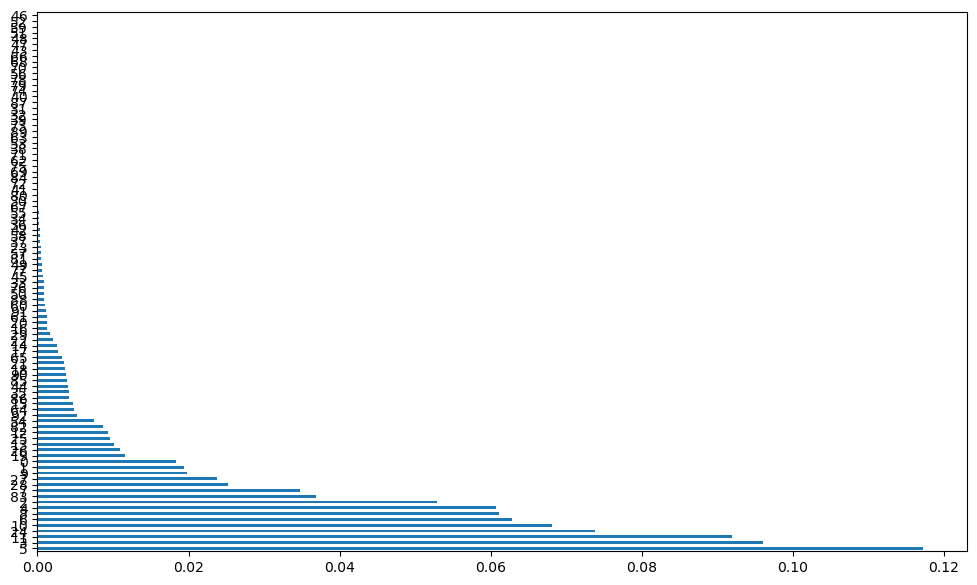

In [108]:
feature_imp(X, rf_clf).plot(kind='barh', figsize=(12,7), legend=False)

Logistic Regression: Best Parameters - {'C': 0.01}
Random Forest: Best Parameters - {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
SVM: Best Parameters - {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Decision Tree: Best Parameters - {'max_depth': 10, 'min_samples_split': 10}
KNN: Best Parameters - {'n_neighbors': 9, 'weights': 'uniform'}


C:\Users\harle\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:03:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: Best Parameters - {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


C:\Users\harle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


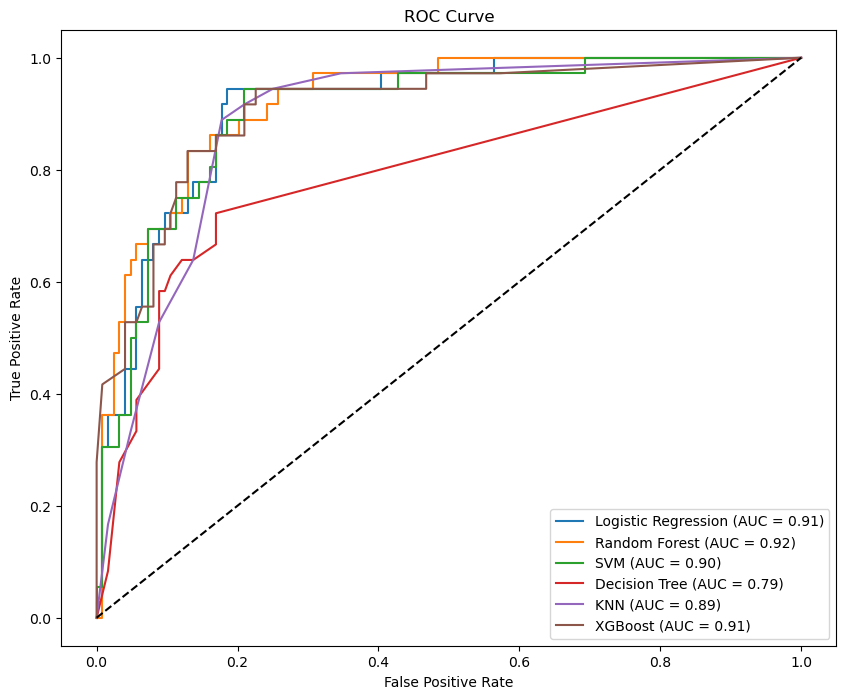

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression   0.80000   0.833333  0.138889  0.238095  0.911066
1        Random Forest   0.87500   0.766667  0.638889  0.696970  0.921371
2                  SVM   0.77500   0.000000  0.000000  0.000000  0.903674
3        Decision Tree   0.83125   0.628571  0.611111  0.619718  0.790659
4                  KNN   0.81250   0.575000  0.638889  0.605263  0.889337
5              XGBoost   0.81875   1.000000  0.194444  0.325581  0.908378


In [114]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Data preparation
X = dataset.drop('ASD', axis=1)
y = dataset.ASD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'linear']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Tune models
tuned_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    tuned_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}")

# Model evaluation
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))
    metrics['ROC AUC'].append(roc_auc_score(y_test, y_prob))

plt.figure(figsize=(10, 8))

for name, model in tuned_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for ax, (name, model) in zip(axes, tuned_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


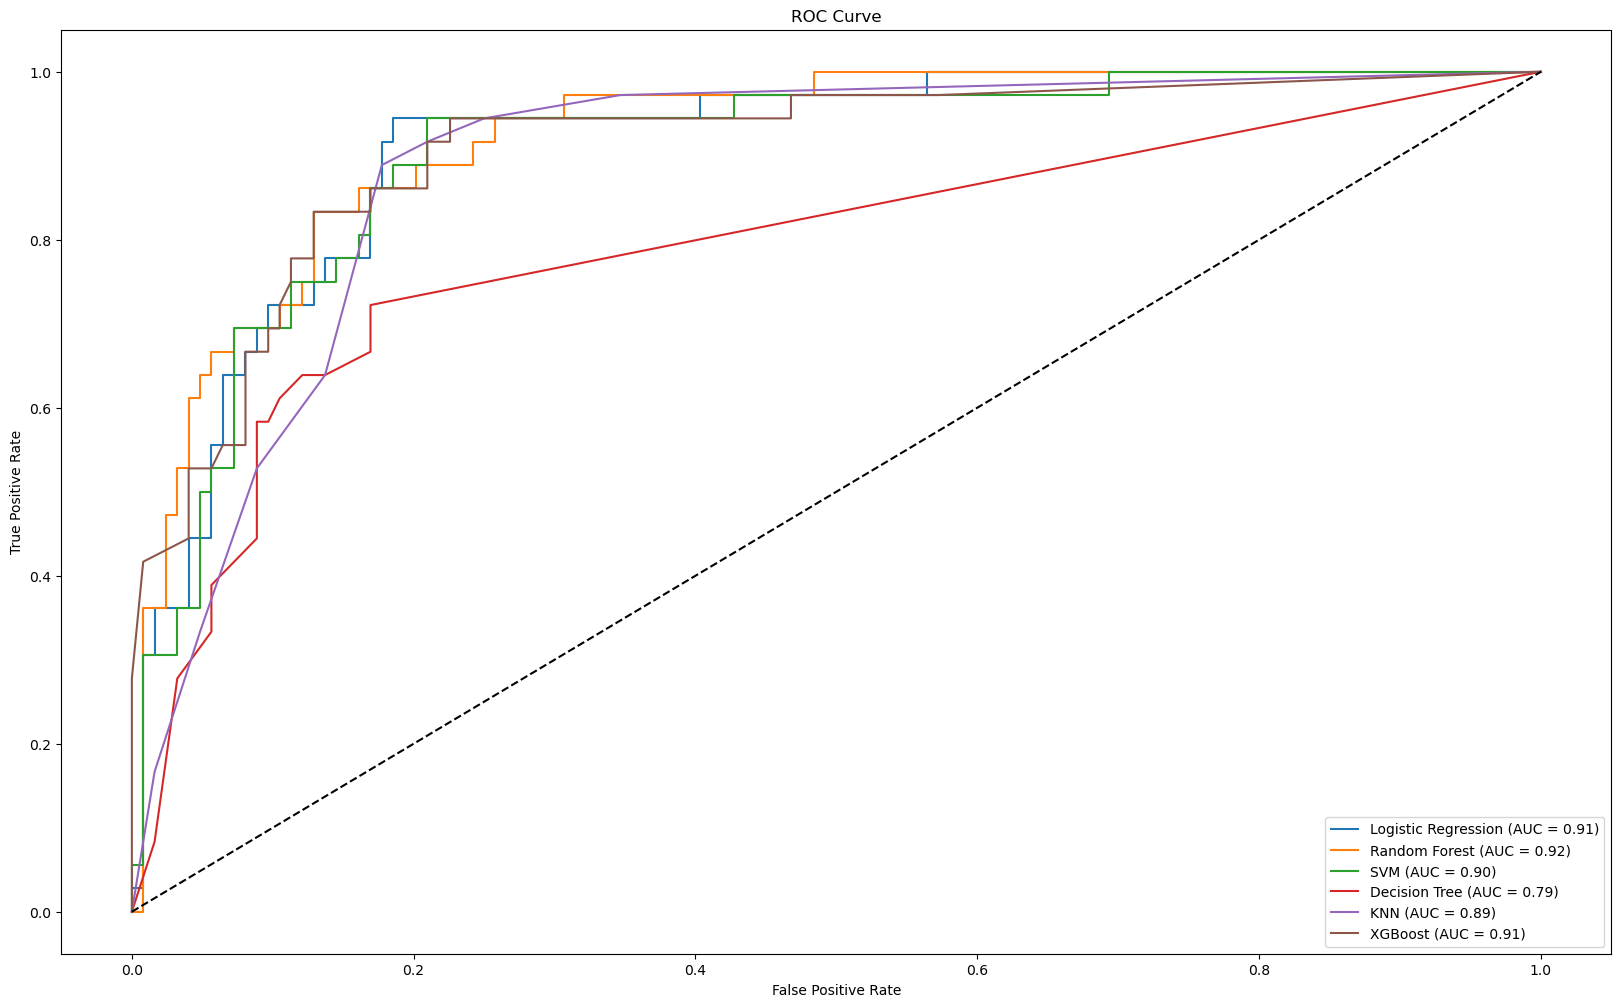

In [131]:
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC AUC curve
plt.figure(figsize=(20, 12))

for name, model in tuned_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
        
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [133]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for ax, (name, model) in zip(axes, tuned_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))
    metrics['ROC AUC'].append(roc_auc_score(y_test, y_prob))

metrics_df = pd.DataFrame(metrics)
print(metrics_df)


C:\Users\harle\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 Model  Accuracy  Precision   Recall  F1 Score   ROC AUC
0  Logistic Regression   0.80000   0.806494  0.80000  0.739363  0.911066
1        Random Forest   0.87500   0.870000  0.87500  0.870795  0.921371
2                  SVM   0.77500   0.600625  0.77500  0.676761  0.903674
3        Decision Tree   0.83125   0.829629  0.83125  0.830400  0.790659
4                  KNN   0.81250   0.820417  0.81250  0.815897  0.889337
5              XGBoost   0.81875   0.853105  0.81875  0.767119  0.908378


## 5.1 Logistic Regression Feature importance 

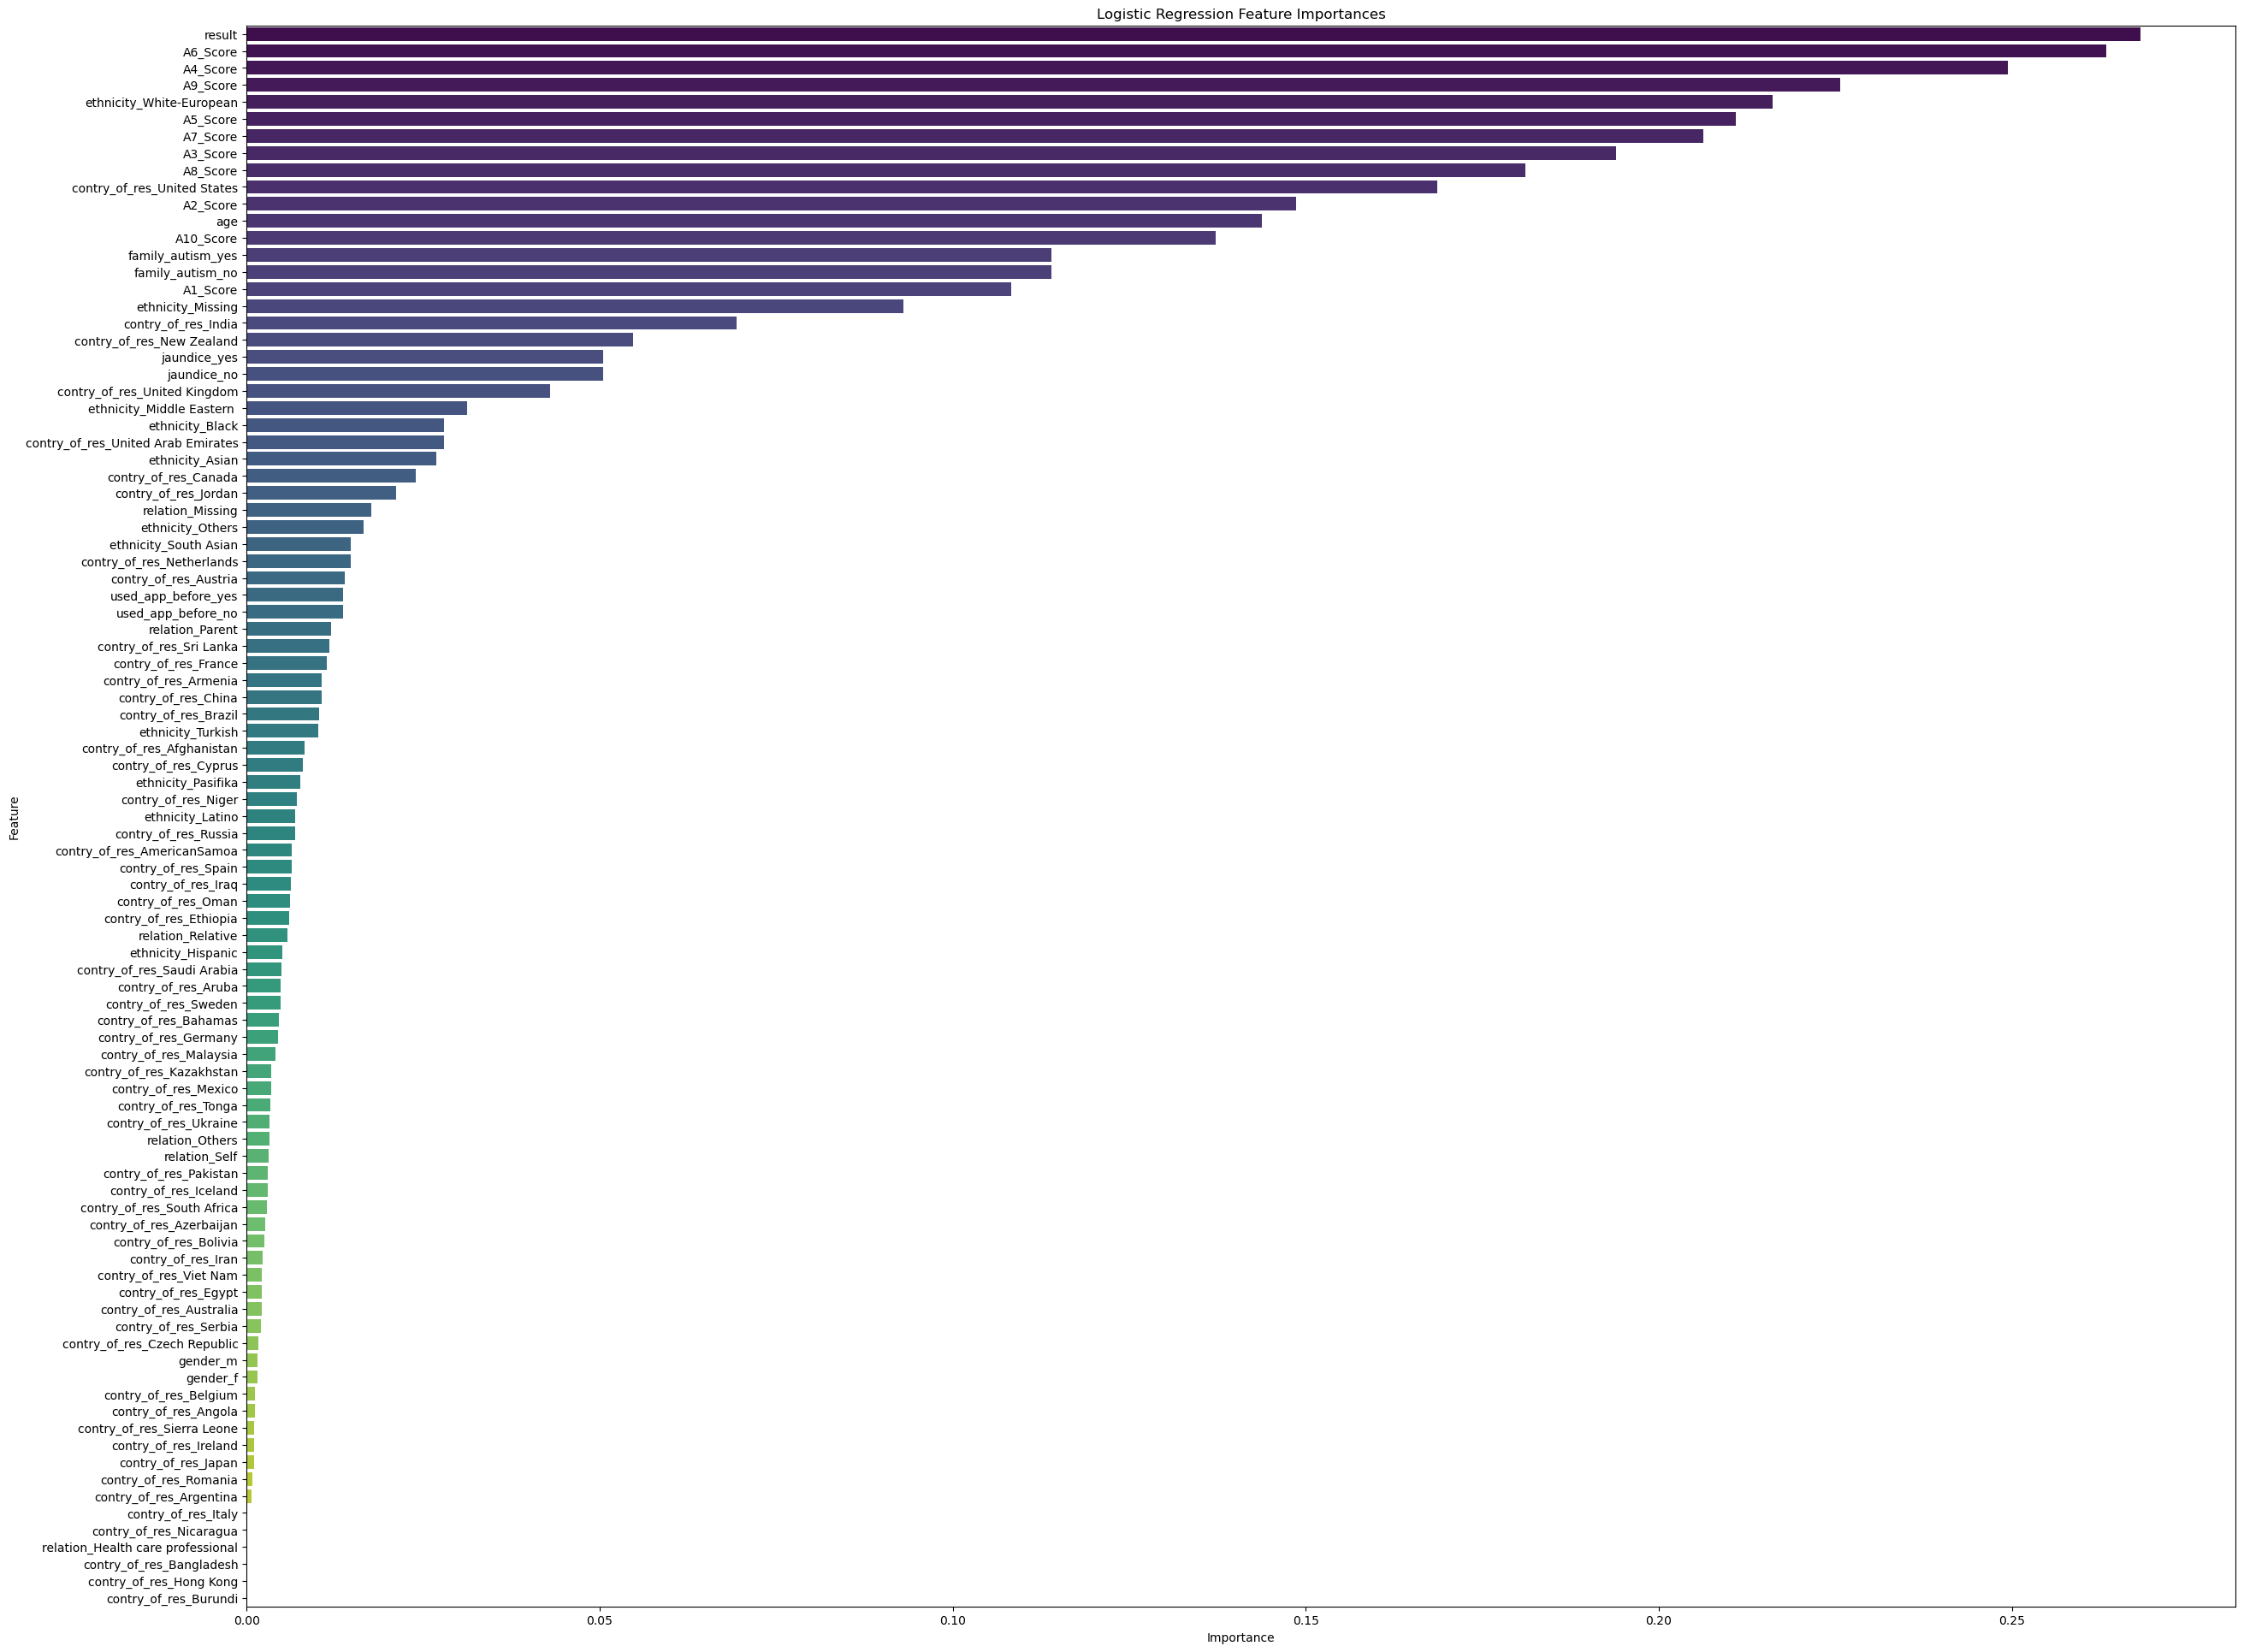

In [126]:
# Logistic Regression Feature Importance
if hasattr(tuned_models['Logistic Regression'], 'coef_'):
    lr_model = tuned_models['Logistic Regression']
    lr_importances = np.abs(lr_model.coef_[0])

    # Create DataFrame for easier plotting
    lr_importances_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': lr_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(30, 24))
    sns.barplot(x='Importance', y='Feature', data=lr_importances_df, palette='viridis')
    plt.title('Logistic Regression Feature Importances')
    plt.show()

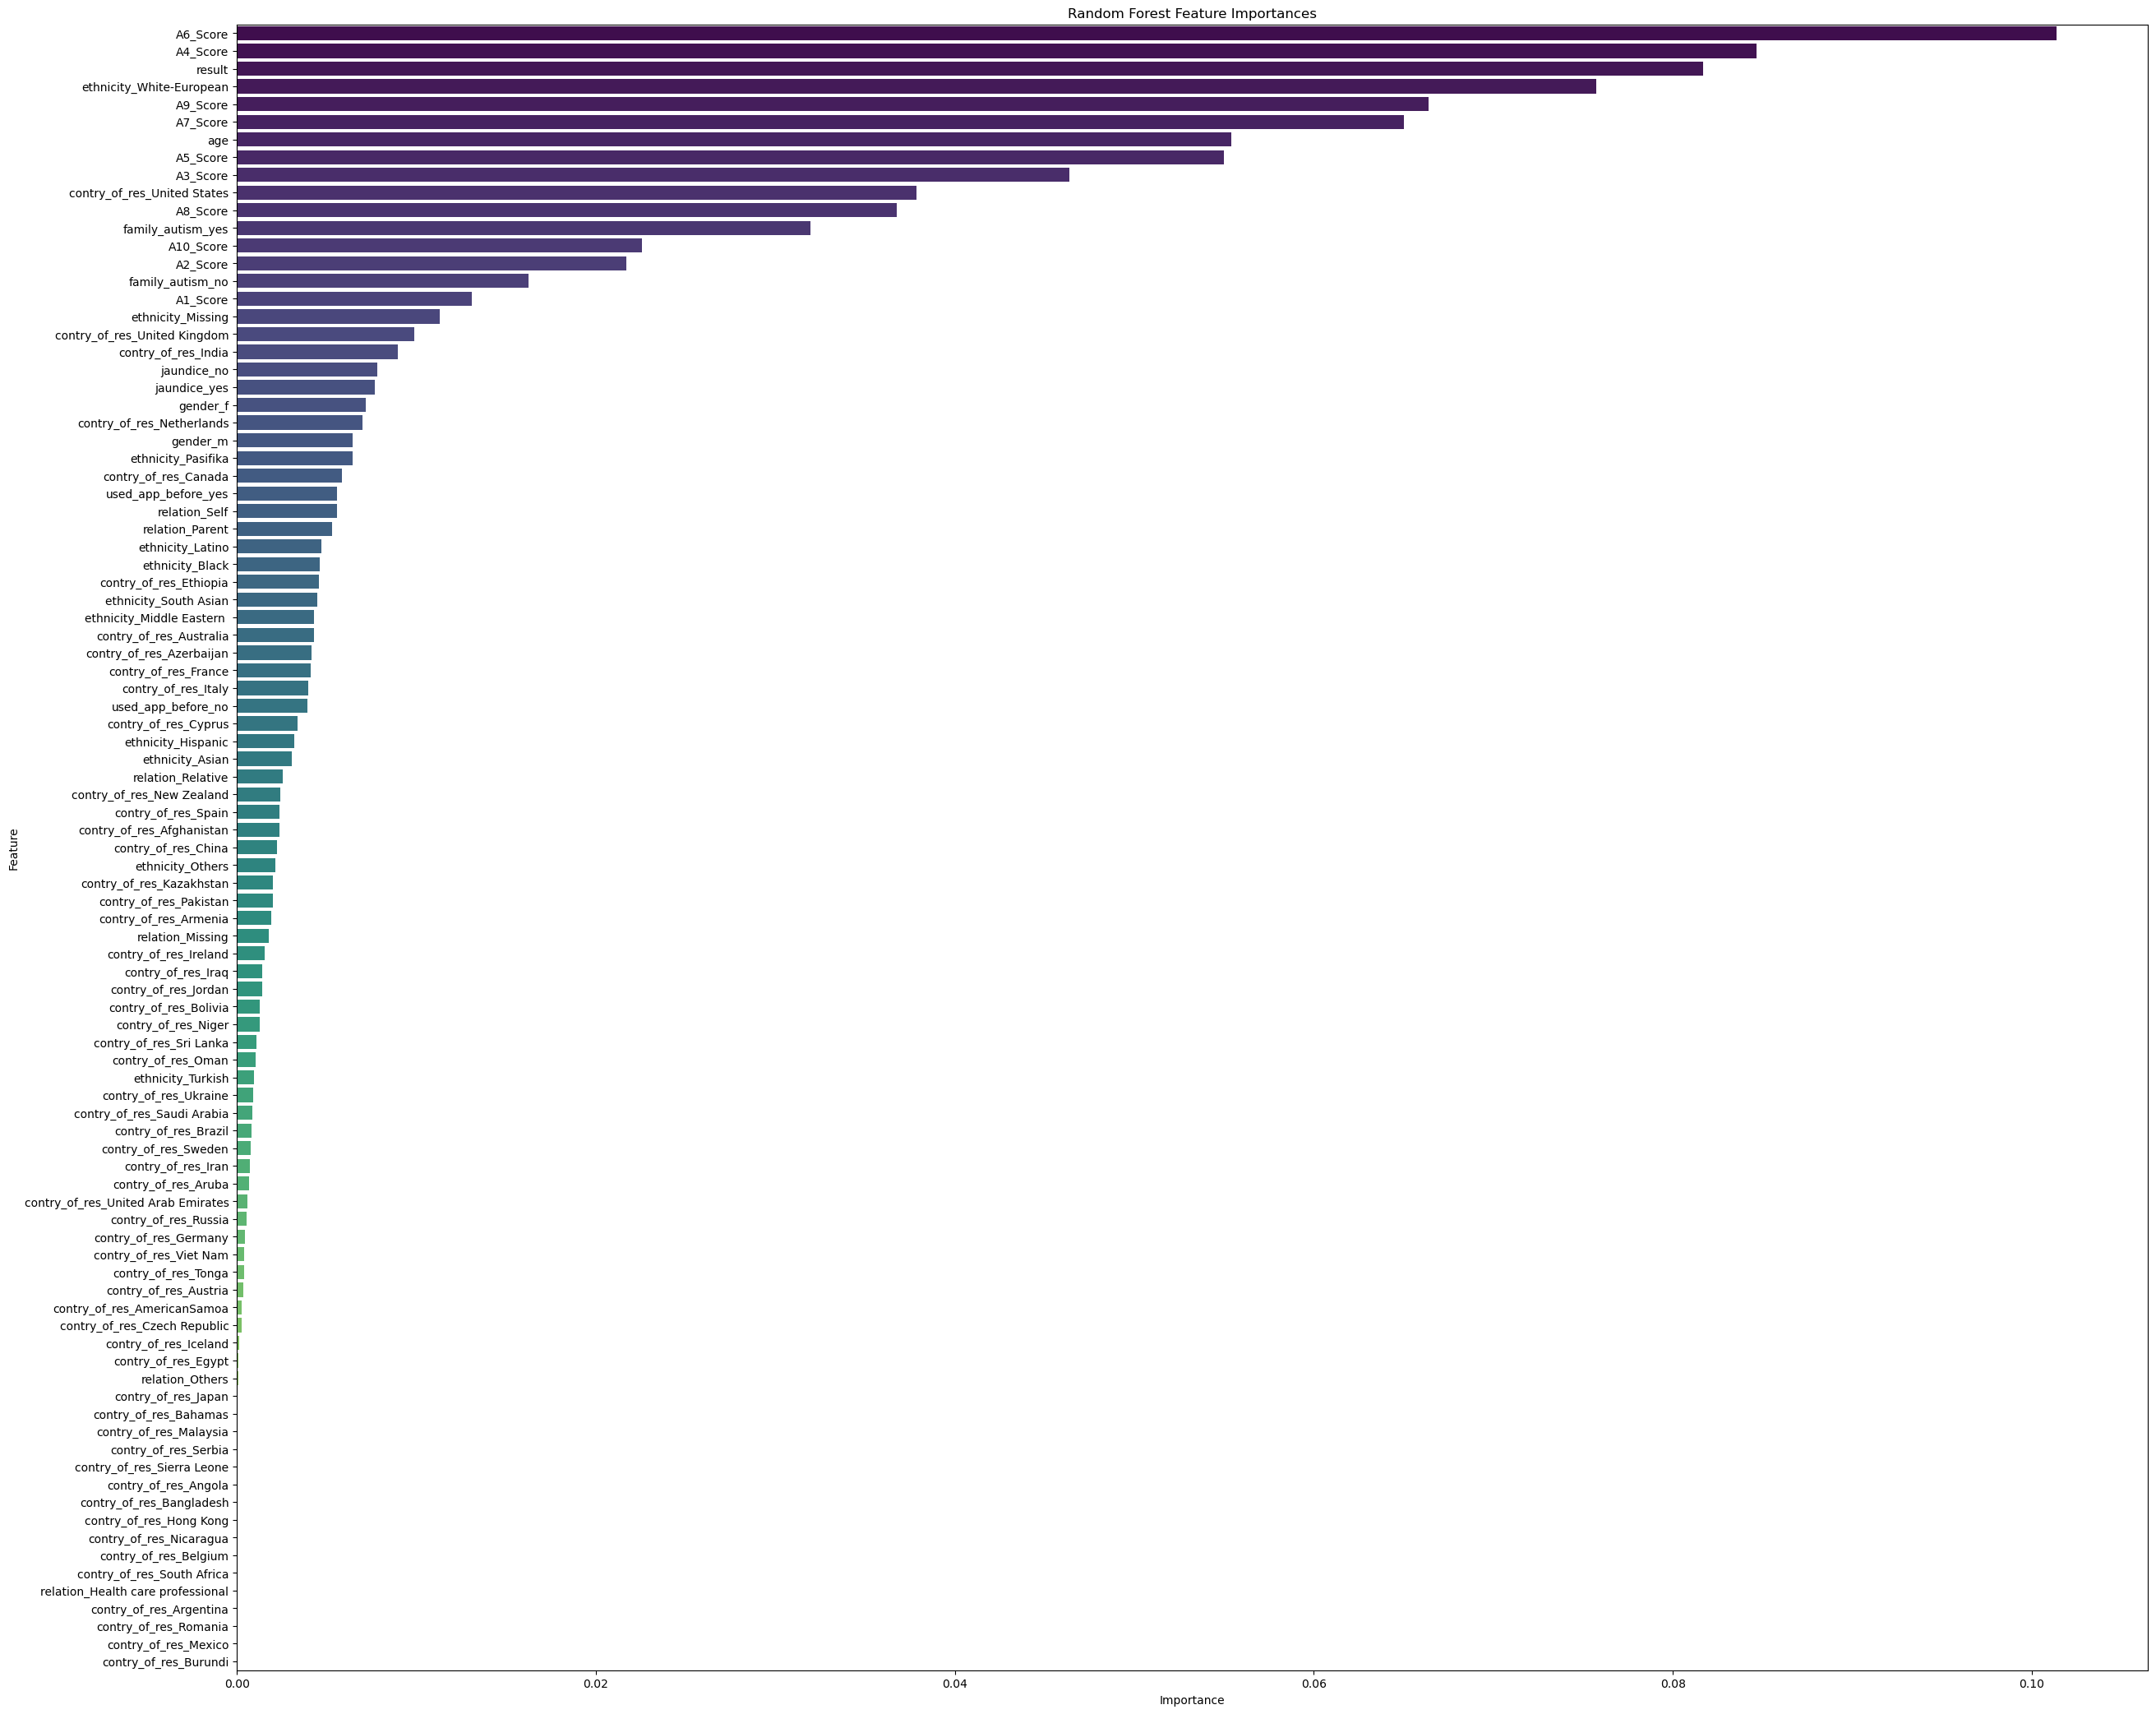

In [139]:
# Random Forest Feature Importance
rf_model = tuned_models['Random Forest']
rf_importances = rf_model.feature_importances_

# Create DataFrame for easier plotting
rf_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(30, 26))
sns.barplot(x='Importance', y='Feature', data=rf_importances_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.show()


In [145]:
#The Random Forest model has the highest accuracy, precision, recall, F1 score, and ROC AUC. This suggests that it performs well across all metrics and is likely the best fit for the dataset in terms of both classification performance and ability to distinguish between classes.
#Random Forest 
Accuracy: 87.5%
Precision: 87.0%
Recall: 87.5%
F1 Score: 87.1%
ROC AUC: 92.1%

#In random forest, scores A6 and A4 have shown to have a great impact on the model. Followed by results, ethnicity (white European), A9, A7 and age
This model proves that age indeed has an impact on the diagnosis of ASD.

SyntaxError: invalid syntax (3391791795.py, line 3)

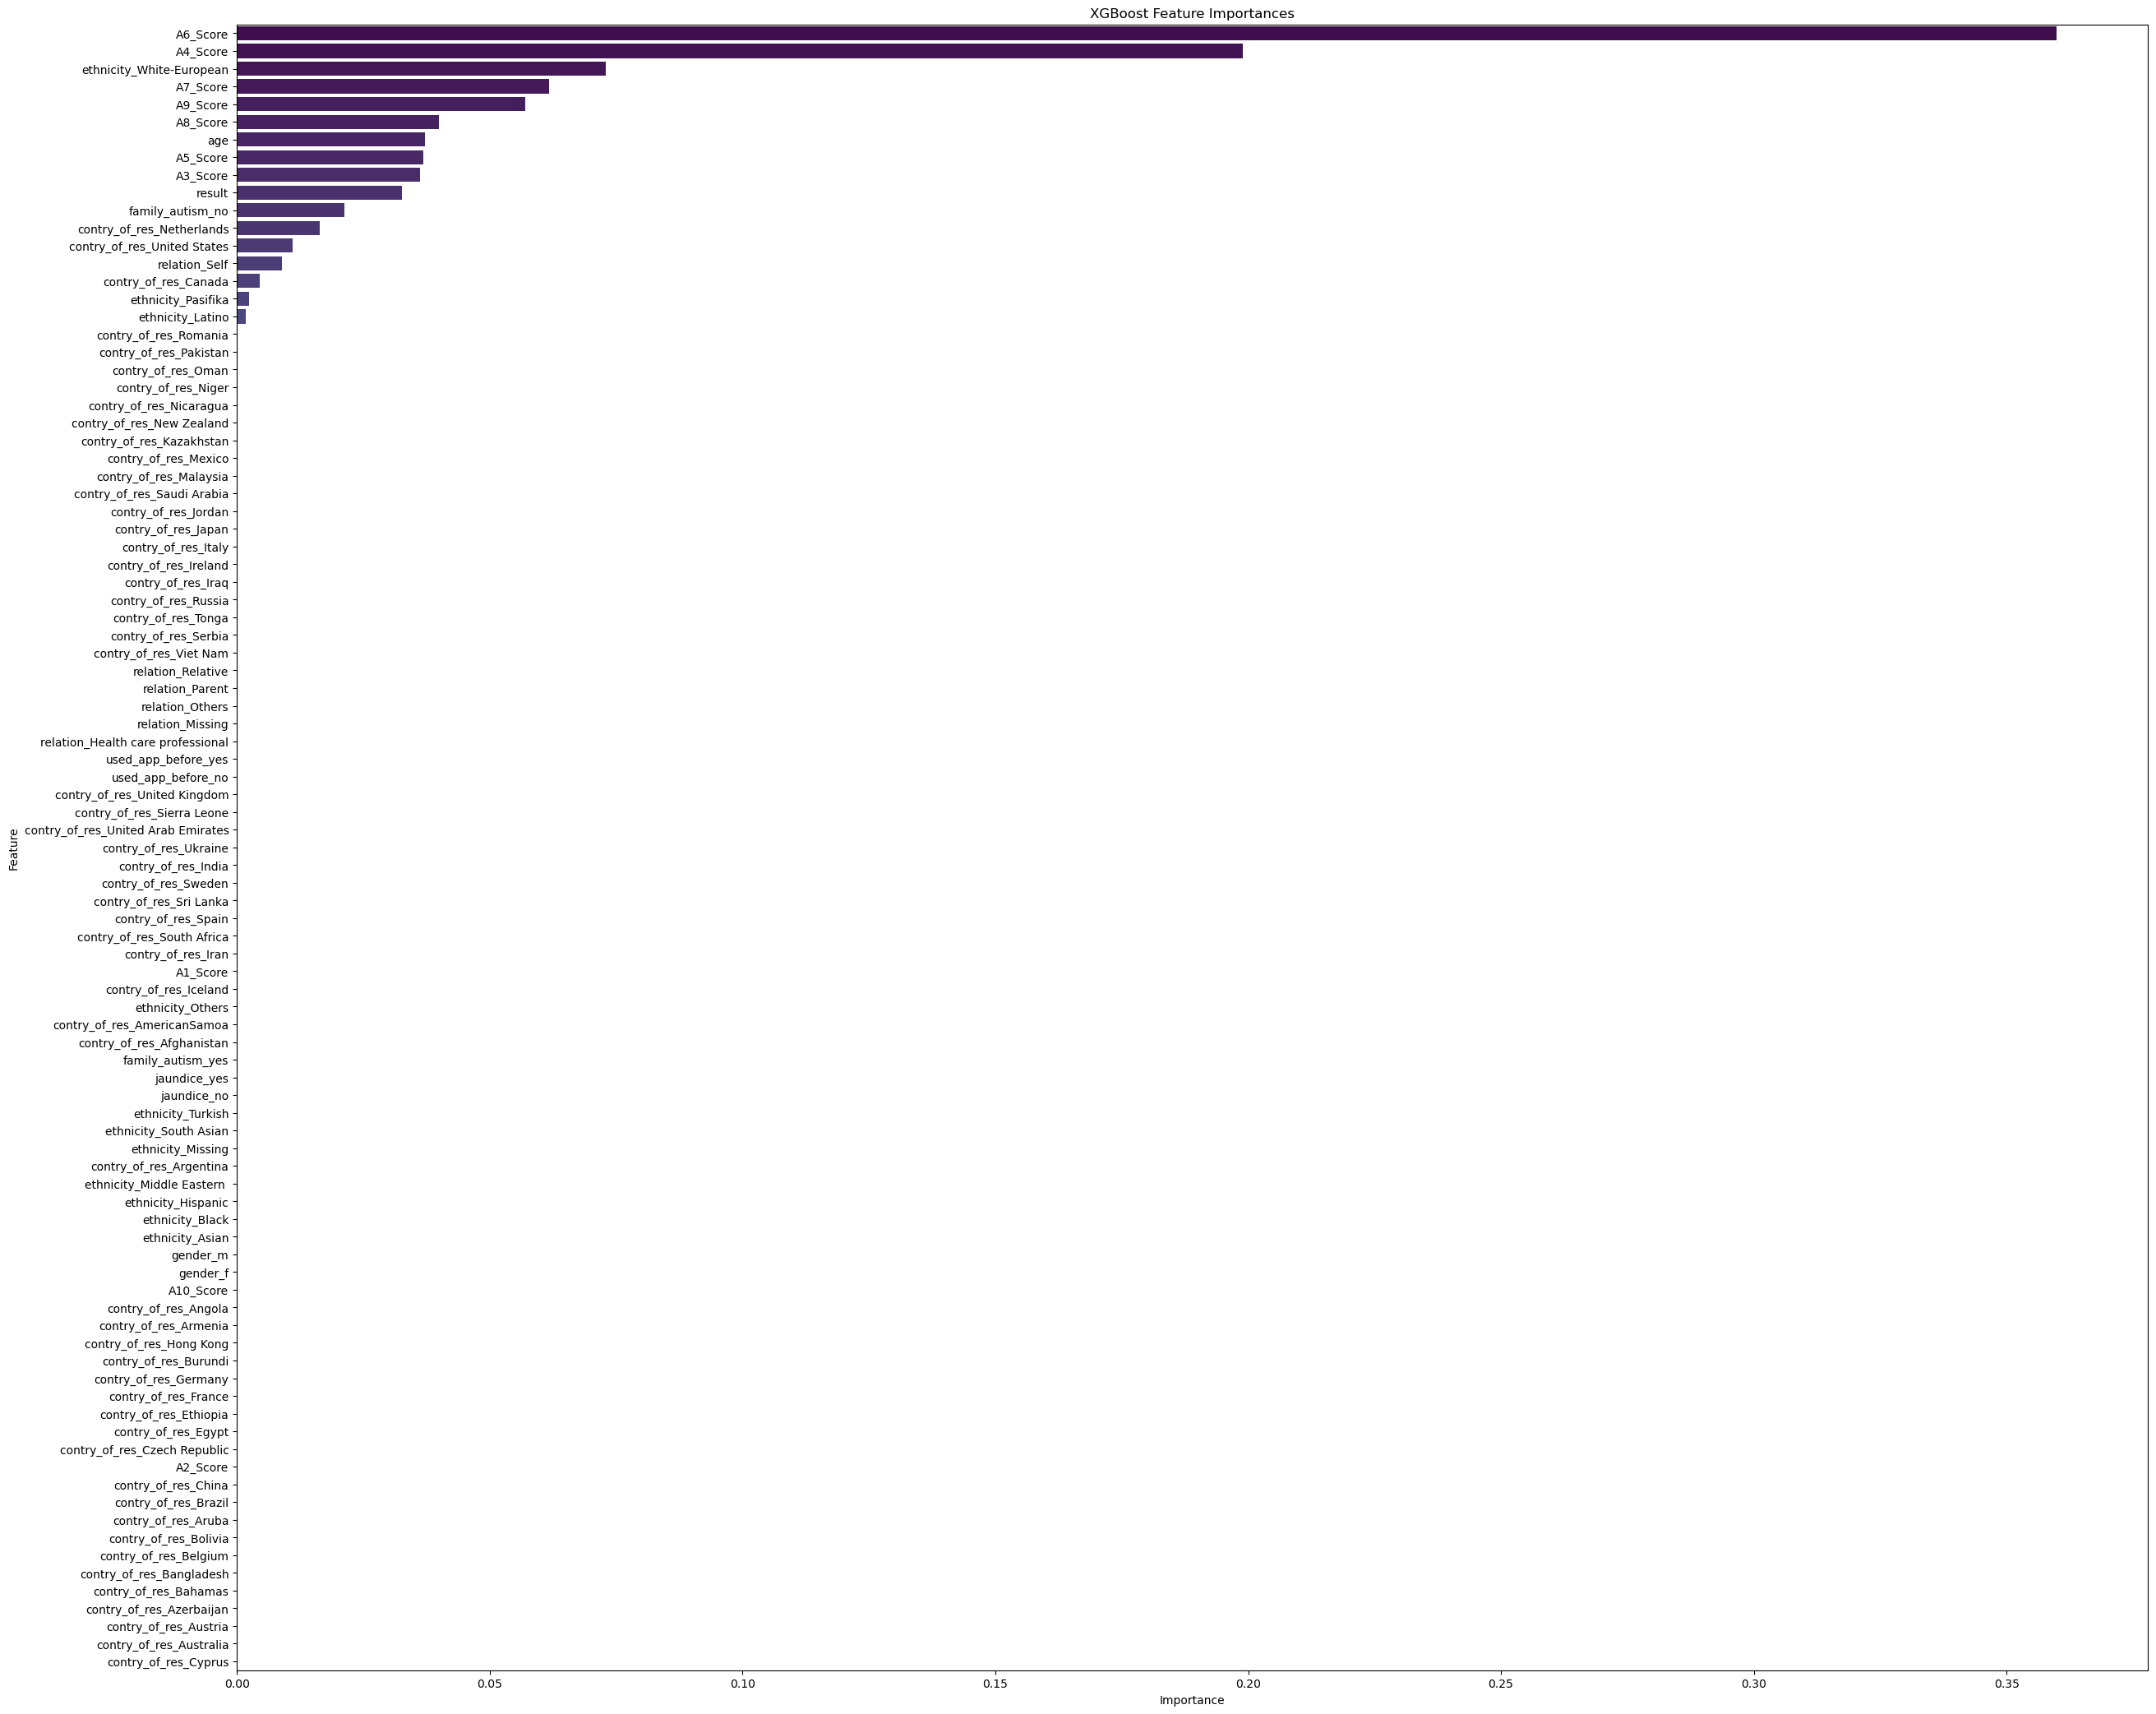

In [143]:
# XGBoost Feature Importance
xgb_model = tuned_models['XGBoost']
xgb_importances = xgb_model.feature_importances_

# Create DataFrame for easier plotting
xgb_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(30, 26))
sns.barplot(x='Importance', y='Feature', data=xgb_importances_df, palette='viridis')
plt.title('XGBoost Feature Importances')
plt.show()


In [ ]:
#Followed by Random Forest, XGBoost also performs well, particularly in precision and ROC AUC. However, it lags behind Random Forest in accuracy, recall, and F1 score.
#Accuracy: 81.9%
#Precision: 85.3%
#Recall: 81.9%
#F1 Score: 76.7%
#ROC AUC: 90.8%


## Feature Selection

In [149]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Assuming X_train, y_train, X_test, y_test are already defined

# Feature Selection using Random Forest Classifier as an example
selector_rf = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='mean')
selector_rf.fit(X_train, y_train)

# Get selected features
selected_features_rf = X_train.columns[(selector_rf.get_support())]
print(f'Selected Features with Random Forest: {list(selected_features_rf)}')

# Transform the dataset to keep only selected features
X_train_rf = selector_rf.transform(X_train)
X_test_rf = selector_rf.transform(X_test)

# Retrain the Random Forest model on the selected features
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train_rf, y_train)

# Evaluate the model with selected features
test_score_rf = accuracy_score(y_test, rf_clf.predict(X_test_rf)) * 100
train_score_rf = accuracy_score(y_train, rf_clf.predict(X_train_rf)) * 100
print(f'Random Forest Training Accuracy: {train_score_rf:.2f}%')
print(f'Random Forest Testing Accuracy: {test_score_rf:.2f}%')


Selected Features with Random Forest: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'gender_f', 'gender_m', 'ethnicity_White-European', 'jaundice_no', 'jaundice_yes', 'family_autism_no', 'family_autism_yes', 'contry_of_res_United Kingdom', 'contry_of_res_United States']
Random Forest Training Accuracy: 100.00%
Random Forest Testing Accuracy: 86.88%


In [153]:
tuned_rf_model = tuned_models['Random Forest']

# Feature selection using the tuned Random Forest model
selector_tuned_rf = SelectFromModel(tuned_rf_model, threshold='mean', prefit=True)

# Get selected features
selected_features_tuned_rf = X_train.columns[(selector_tuned_rf.get_support())]
print(f'Selected Features with Tuned Random Forest: {list(selected_features_tuned_rf)}')

# Transform the dataset to keep only selected features
X_train_tuned_rf = selector_tuned_rf.transform(X_train)
X_test_tuned_rf = selector_tuned_rf.transform(X_test)

# Retrain the tuned Random Forest model on the selected features
tuned_rf_model.fit(X_train_tuned_rf, y_train)

# Evaluate the tuned Random Forest model with the selected features
test_score_tuned_rf = accuracy_score(y_test, tuned_rf_model.predict(X_test_tuned_rf)) * 100
train_score_tuned_rf = accuracy_score(y_train, tuned_rf_model.predict(X_train_tuned_rf)) * 100
print(f'Tuned Random Forest Training Accuracy: {train_score_tuned_rf:.2f}%')
print(f'Tuned Random Forest Testing Accuracy: {test_score_tuned_rf:.2f}%')

# Optionally, you can calculate other metrics like Precision, Recall, F1 Score, and ROC AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Predictions on the test set
y_pred_tuned_rf = tuned_rf_model.predict(X_test_tuned_rf)
y_prob_tuned_rf = tuned_rf_model.predict_proba(X_test_tuned_rf)[:, 1]

# Calculate and print evaluation metrics
precision_tuned_rf = precision_score(y_test, y_pred_tuned_rf)
recall_tuned_rf = recall_score(y_test, y_pred_tuned_rf)
f1_tuned_rf = f1_score(y_test, y_pred_tuned_rf)
roc_auc_tuned_rf = roc_auc_score(y_test, y_prob_tuned_rf)

print(f'Tuned Random Forest Precision: {precision_tuned_rf:.2f}')
print(f'Tuned Random Forest Recall: {recall_tuned_rf:.2f}')
print(f'Tuned Random Forest F1 Score: {f1_tuned_rf:.2f}')
print(f'Tuned Random Forest ROC AUC: {roc_auc_tuned_rf:.2f}')

Selected Features with Tuned Random Forest: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'ethnicity_Missing', 'ethnicity_White-European', 'family_autism_no', 'family_autism_yes', 'contry_of_res_United States']


C:\Users\harle\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\harle\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Tuned Random Forest Training Accuracy: 93.12%
Tuned Random Forest Testing Accuracy: 85.00%
Tuned Random Forest Precision: 0.70
Tuned Random Forest Recall: 0.58
Tuned Random Forest F1 Score: 0.64
Tuned Random Forest ROC AUC: 0.91


In [155]:
tuned_xgb_model = tuned_models['XGBoost']

# Feature selection using the tuned XGBoost model
selector_tuned_xgb = SelectFromModel(tuned_xgb_model, threshold='mean', prefit=True)

# Get selected features
selected_features_tuned_xgb = X_train.columns[(selector_tuned_xgb.get_support())]
print(f'Selected Features with Tuned XGBoost: {list(selected_features_tuned_xgb)}')

# Transform the dataset to keep only selected features
X_train_tuned_xgb = selector_tuned_xgb.transform(X_train)
X_test_tuned_xgb = selector_tuned_xgb.transform(X_test)

# Retrain the tuned XGBoost model on the selected features
tuned_xgb_model.fit(X_train_tuned_xgb, y_train)

# Evaluate the tuned XGBoost model with the selected features
test_score_tuned_xgb = accuracy_score(y_test, tuned_xgb_model.predict(X_test_tuned_xgb)) * 100
train_score_tuned_xgb = accuracy_score(y_train, tuned_xgb_model.predict(X_train_tuned_xgb)) * 100
print(f'Tuned XGBoost Training Accuracy: {train_score_tuned_xgb:.2f}%')
print(f'Tuned XGBoost Testing Accuracy: {test_score_tuned_xgb:.2f}%')

# Optionally, you can calculate other metrics like Precision, Recall, F1 Score, and ROC AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Predictions on the test set
y_pred_tuned_xgb = tuned_xgb_model.predict(X_test_tuned_xgb)
y_prob_tuned_xgb = tuned_xgb_model.predict_proba(X_test_tuned_xgb)[:, 1]

# Calculate and print evaluation metrics
precision_tuned_xgb = precision_score(y_test, y_pred_tuned_xgb)
recall_tuned_xgb = recall_score(y_test, y_pred_tuned_xgb)
f1_tuned_xgb = f1_score(y_test, y_pred_tuned_xgb)
roc_auc_tuned_xgb = roc_auc_score(y_test, y_prob_tuned_xgb)

print(f'Tuned XGBoost Precision: {precision_tuned_xgb:.2f}')
print(f'Tuned XGBoost Recall: {recall_tuned_xgb:.2f}')
print(f'Tuned XGBoost F1 Score: {f1_tuned_xgb:.2f}')
print(f'Tuned XGBoost ROC AUC: {roc_auc_tuned_xgb:.2f}')

Selected Features with Tuned XGBoost: ['A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'age', 'result', 'ethnicity_White-European', 'family_autism_no', 'contry_of_res_Netherlands', 'contry_of_res_United States']
Tuned XGBoost Training Accuracy: 84.53%
Tuned XGBoost Testing Accuracy: 81.88%
Tuned XGBoost Precision: 1.00
Tuned XGBoost Recall: 0.19
Tuned XGBoost F1 Score: 0.33
Tuned XGBoost ROC AUC: 0.91


C:\Users\harle\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\harle\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\harle\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:33:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [162]:
!pip install shap


In [168]:
# Step 1: Feature Selection using Tuned XGBoost
from sklearn.feature_selection import SelectFromModel
from xgboost import plot_importance
import shap
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Assume 'tuned_models' contains the tuned XGBoost model
tuned_xgb = tuned_models['XGBoost']

# Feature selection using SelectFromModel with the tuned XGBoost
selector_xgb = SelectFromModel(tuned_xgb, threshold='mean', prefit=True)

# Selecting features
selected_features = X_train.columns[selector_xgb.get_support()]
print(f'Selected Features with Tuned XGBoost: {list(selected_features)}')

# Transform the training and test set to keep only the selected features
X_train_selected = selector_xgb.transform(X_train)
X_test_selected = selector_xgb.transform(X_test) 

# Retrain the tuned XGBoost model on the selected features
tuned_xgb.fit(X_train_selected, y_train)

# Step 2: Model Evaluation on Selected Features
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict and evaluate
y_pred = tuned_xgb.predict(X_test_selected)
y_prob = tuned_xgb.predict_proba(X_test_selected)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Step 3: Model Interpretation with SHAP Values
# Compute SHAP values
explainer = shap.TreeExplainer(tuned_xgb)
shap_values = explainer.shap_values(X_test_selected)

# Plot SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_selected, feature_names=selected_features)

# Step 4: Partial Dependence Plot (PDP)
# Visualizing the effect of selected features
plt.figure(figsize=(12, 8))
plot_partial_dependence(tuned_xgb, X_test_selected, features=[0, 1], feature_names=selected_features, grid_resolution=50)
plt.suptitle('Partial Dependence Plots for Selected Features', fontsize=16)
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 93 but corresponding boolean dimension is 13

## Smote

In [179]:
# Required imports
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Initialize the imputer and scaler
imputer = SimpleImputer(strategy='mean')  # Example: Imputes missing values with the mean
scaler = StandardScaler()  # Example: StandardScaler to scale data

# Impute and scale the data
X_train_processed = pd.DataFrame(scaler.fit_transform(imputer.fit_transform(X_train)), columns=X_train.columns)
X_test_processed = pd.DataFrame(scaler.transform(imputer.transform(X_test)), columns=X_test.columns)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

# Train Random Forest with class weights
rf_model_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_weighted.fit(X_train_processed, y_train)
y_pred_rf_weighted = rf_model_weighted.predict(X_test_processed)
accuracy_rf_weighted = accuracy_score(y_test, y_pred_rf_weighted)

# Train Random Forest with SMOTE
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_model_smote.predict(X_test_processed)
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)

# Display the results
print("Random Forest with Class Weights Accuracy:", accuracy_rf_weighted)
print("Random Forest with SMOTE Accuracy:", accuracy_rf_smote)


Random Forest with Class Weights Accuracy: 0.85625
Random Forest with SMOTE Accuracy: 0.86875


In [ ]:
# The Random Forest model with SMOTE achieved the highest accuracy (86.87%), 
# indicating that handling class imbalance with SMOTE can improve model performance.